In [236]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro
import scipy.stats

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 

In [237]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]


In [238]:
def result(probability_value,alpha):
    if probability_value<alpha:
        print(" Reject h0")
    else:
        print("fail to reject h0")

In [239]:
df=pd.read_json("modcloth_final_data.json",lines=True)
df

item_id  waist  size  quality cup size  hips  bra size   category bust  \
0       123373   29.0     7      5.0        d  38.0      34.0        new   36   
1       123373   31.0    13      3.0        b  30.0      36.0        new  NaN   
2       123373   30.0     7      2.0        b   NaN      32.0        new  NaN   
3       123373    NaN    21      5.0     dd/e   NaN       NaN        new  NaN   
4       123373    NaN    18      5.0        b   NaN      36.0        new  NaN   
...        ...    ...   ...      ...      ...   ...       ...        ...  ...   
82785   807722    NaN     8      4.0        b   NaN      36.0  outerwear  NaN   
82786   807722    NaN    12      5.0    ddd/f   NaN      34.0  outerwear  NaN   
82787   807722    NaN    12      5.0   dddd/g  36.0      32.0  outerwear  NaN   
82788   807722    NaN    12      4.0      NaN   NaN       NaN  outerwear  NaN   
82789   807722    NaN     4      4.0        d  39.0      32.0  outerwear  NaN   

        height         user_name         length    fit  user_id  shoe size  \
0      5ft 6in             Emily     just right  small   991571        NaN   
1      5ft 2in  sydneybraden2001     just right  small   587883        NaN   
2      5ft 7in             Ugggh  slightly long  small   395665        9.0   
3          NaN      alexmeyer626     just right    fit   875643        NaN   
4      5ft 2in        dberrones1  slightly long  small   944840        NaN   
...        ...               ...            ...    ...      ...        ...   
82785  5ft 8in          Jennifer     just right    fit   727820        8.5   
82786  5ft 5in             Kelli  slightly long  small   197040        NaN   
82787  5ft 4in          elacount     just right    fit   102493        NaN   
82788  5ft 3in      jennaklinner     just right    fit   756491        NaN   
82789      6ft   maireadsteadman     just right    fit    78305        NaN   

      shoe width             review_summary  \
0            NaN                        NaN   
1            NaN                        NaN   
2            NaN                        NaN   
3            NaN                        NaN   
4            NaN                        NaN   
...          ...                        ...   
82785    average               Cute jacket!   
82786        NaN   It's a beautiful jacket.   
82787        NaN  I love this blazer. It is   
82788        NaN  I love this blazer!! I wo   
82789        NaN  I love this piece. I'm re   

                                             review_text  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
82785                                       Cute jacket!  
82786  It's a beautiful jacket. I love how it's knit ...  
82787  I love this blazer. It is a great office piece...  
82788  I love this blazer!! I wore it yesterday and g...  
82789       I love this piece. I'm really happy with it!  

[82790 rows x 18 columns]

In [240]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

MISSING DATA ANALYSIS

In [241]:
df.waist.unique()

array([29., 31., 30., nan, 27., 26., 28., 25., 32., 34., 44., 33., 23.,
       49., 37., 42., 20., 35., 24., 36., 40., 38., 48., 22., 41., 21.,
       39., 45., 43., 46., 47., 50.])

In [242]:
print(df.waist.skew())          # positive skew, hence replacing nan values with median
print(len(df[(df.waist<df.waist.mean())]))
print(len(df[(df.waist>df.waist.mean())]))
print(len(df[(df.waist<df.waist.median())]))
print(len(df[(df.waist>df.waist.median())]))
print(df.waist.median())
print(df.waist.isna().sum())

0.9930606262915979
1744
1138
1317
1328
30.0
79908


In [243]:
df.waist.fillna(30.0,inplace=True)
df["waist"]=df.waist.astype(int)

In [244]:
print(df.quality.unique())
print(df.quality.skew())   # negative skew, replacing with median
print(len(df[(df.quality<df.quality.mean())]))
print(len(df[(df.quality>df.quality.mean())]))
print(len(df[(df.quality<df.quality.median())]))
print(len(df[(df.quality>df.quality.median())]))
print(df.quality.median())
df.quality.fillna(4.0,inplace=True)
df["quality"]=df.quality.astype(int)

[ 5.  3.  2.  1.  4. nan]
-0.6767774975693622
26000
56722
26000
29604
4.0


In [245]:
df["cup size"].unique()
df["cup size"].mode()
df["cup size"].fillna('c',inplace=True)
df["cup size"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 82790 entries, 0 to 82789
Series name: cup size
Non-Null Count  Dtype 
--------------  ----- 
82790 non-null  object
dtypes: object(1)
memory usage: 646.9+ KB


In [246]:
print(df.hips.skew())          # positive skew, hence replacing nan values with median
print(len(df[(df.hips<df.hips.mean())]))
print(len(df[(df.hips>df.hips.mean())]))
print(len(df[(df.hips<df.hips.median())]))
print(len(df[(df.hips>df.hips.median())]))
print(df.hips.median())
print(df.hips.isna().sum())
df.hips.fillna(39.0,inplace=True)
df["hips"]=df.hips.astype(int)


0.9691874732078445
33586
22478
24871
27930
39.0
26726


In [247]:
print(df["bra size"].skew())          # positive skew, hence replacing nan values with median
print(len(df[(df["bra size"]<df["bra size"].mean())]))
print(len(df[(df["bra size"]>df["bra size"].mean())]))
print(len(df[(df["bra size"]<df["bra size"].median())]))
print(len(df[(df["bra size"]>df["bra size"].median())]))
print(df["bra size"].median())
print(df["bra size"].isna().sum())
df["bra size"].fillna(36.0,inplace=True)
df["bra size"]=df.hips.astype(int)


0.9010040022340067
33748
43024
33748
23400
36.0
6018


In [248]:
print(df.bust.unique())          # positive skew, hence replacing nan values with median
df["bust"]=df.bust.str.replace("3739","37")
print(df["bust"].mode())
print(df["bust"].isna().sum())
df.bust.fillna('36',inplace=True)

['36' nan '39' '34' '43' '35' '38' '33' '40' '41' '44' '45' '37' '30' '32'
 '42' '48' '46' '51' '25' '31' '26' '52' '22' '50' '47' '56' '58' '49'
 '54' '55' '53' '27' '28' '29' '20' '57' '23' '37-39' '24' '59']
0    36
Name: bust, dtype: object
70936


In [249]:
print(df.height.unique())
print(df.height.mode())   # negative skew, replacing with median

#df.height.fillna("5ft 4in",inplace=True)
#df["quality"]=df.quality.astype(int)


['5ft 6in' '5ft 2in' '5ft 7in' nan '5ft 4in' '5ft 3in' '5ft 5in'
 '5ft 10in' '5ft 8in' '5ft' '5ft 9in' '5ft 1in' '5ft 11in' '4ft 11in'
 '4ft 10in' '6ft' '3ft 4in' '4ft 9in' '6ft 3in' '6ft 1in' '6ft 2in' '3ft'
 '4ft 7in' '4ft 4in' '7ft 11in' '4ft 2in' '6ft 6in' '4ft 8in' '6ft 4in'
 '3ft 11in' '6ft 5in' '7ft 6in' '3ft 6in' '3ft 3in' '6ft 8in' '7ft 5in'
 '7ft 3in' '7ft 7in' '6ft 7in' '4ft 5in' '3ft 2in' '4ft 6in']
0    5ft 4in
Name: height, dtype: object


In [250]:
df["height_encoded"]=df.height.map(df.height.value_counts(normalize=True))
df.height_encoded.median()
df.height_encoded.fillna(0.112153079588164,inplace=True)

In [251]:
df.length.mode()
df.length.fillna("just right",inplace=True)
df.length.isna().sum()

0

In [252]:
df["shoe size"].skew()
df["shoe size"].median()
df["shoe size"].fillna(8.0,inplace=True)
df["shoe size"]=df["shoe size"].astype(int)

In [253]:
df["shoe width"].unique()
df["shoe width"].mode()
df["shoe width"].fillna("average",inplace=True)

In [254]:
df["review_summary"].unique()
df["review_summary"].mode()
df["review_summary"].fillna("Love it!",inplace=True)

In [255]:
df["review_text"].unique()
df["review_text"].mode()
df["review_text"].fillna("Love it!",inplace=True)

In [256]:
df.rename(columns={"cup size":"cup_size","bra size":"bra_size","shoe size":"shoe_size","shoe width":"shoe_width"},inplace=True)
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text',
       'height_encoded'],
      dtype='object')

4.3 Check the distribution of the variables using Histogram or Dist plot or KDE 
and boxplot etc.
Kindly explore at least two.


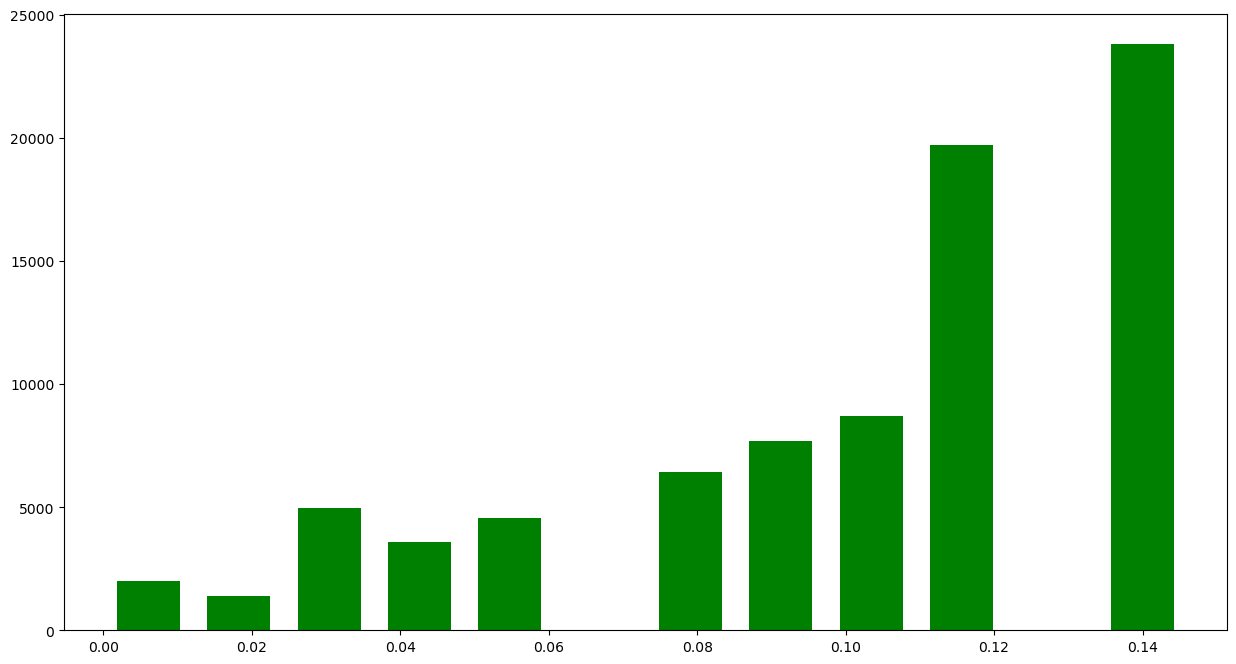

0.10219867486774639
0.112153079588164


In [257]:
r=plt.hist(df.height_encoded,bins=12,rwidth=0.7,color="green")
plt.show()
print(df.height_encoded.mean())
print(df.height_encoded.median())


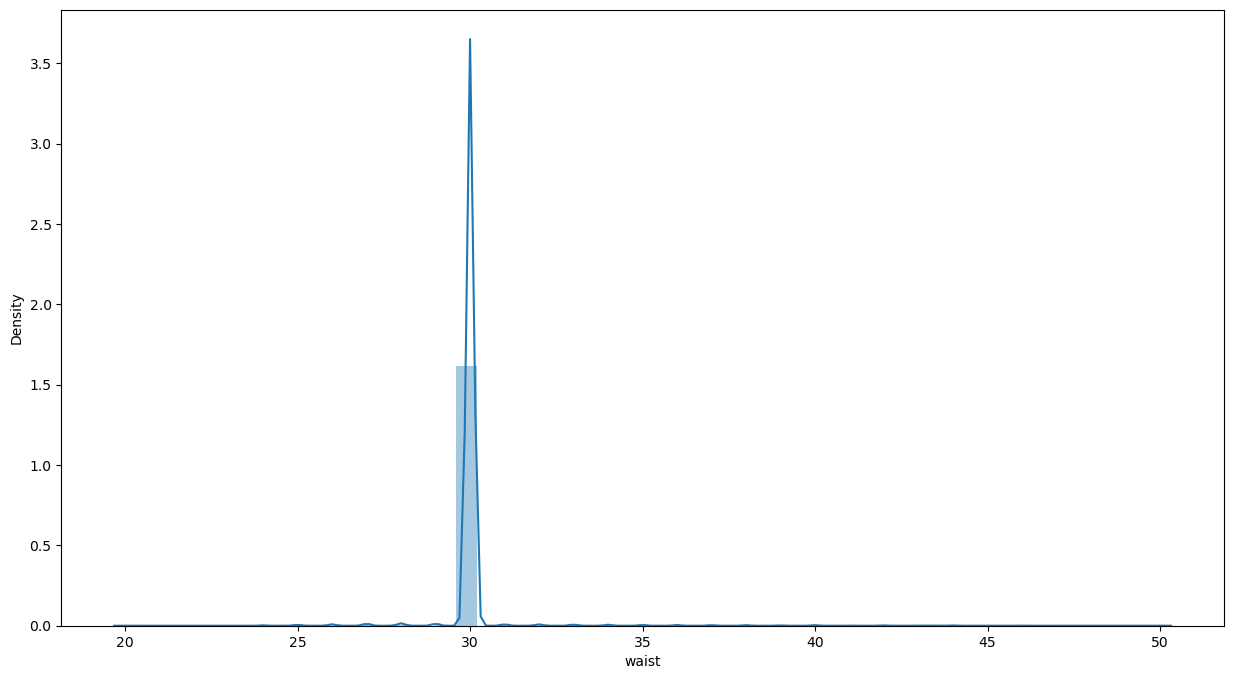

In [258]:
sns.distplot(df.waist,hist=True,kde=True)
plt.show()

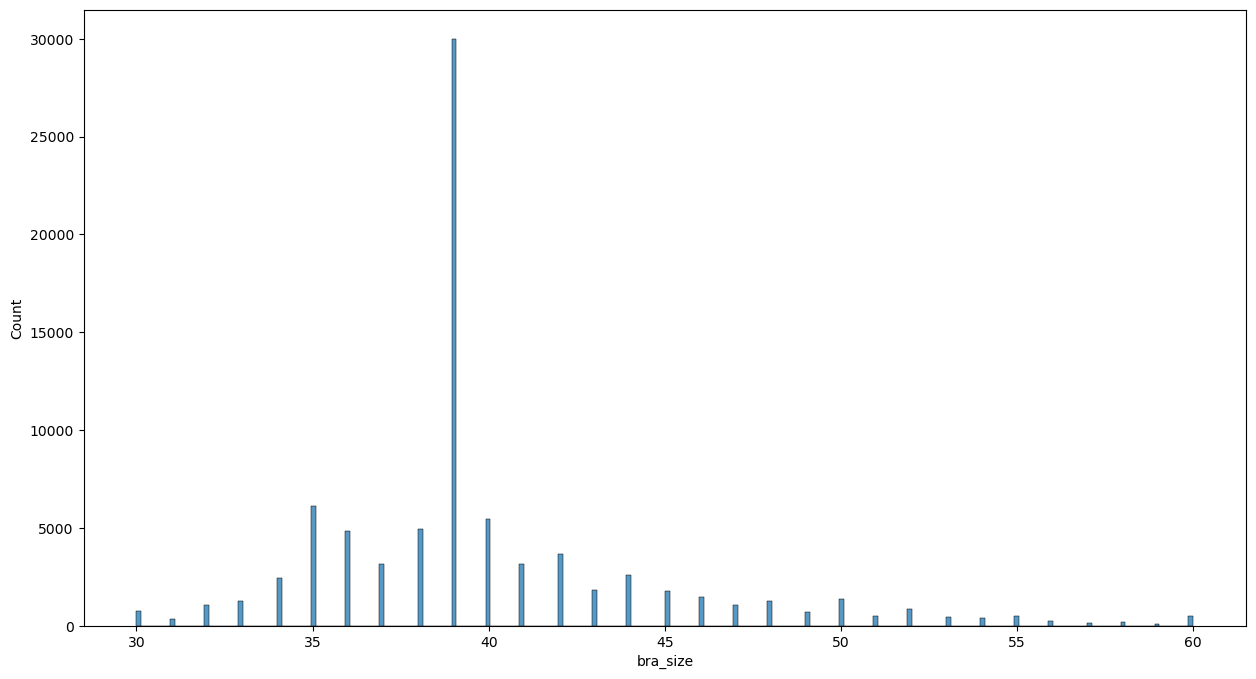

In [259]:
sns.histplot(df.bra_size)
plt.show()

4.4 Check the Skewness and Kurtosis.
Explain what the Skewness and Kurtosis describe.

In [260]:
numeric=df.select_dtypes(include="number")
numeric

item_id  waist  size  quality  hips  bra_size  user_id  shoe_size  \
0       123373     29     7        5    38        38   991571          8   
1       123373     31    13        3    30        30   587883          8   
2       123373     30     7        2    39        39   395665          9   
3       123373     30    21        5    39        39   875643          8   
4       123373     30    18        5    39        39   944840          8   
...        ...    ...   ...      ...   ...       ...      ...        ...   
82785   807722     30     8        4    39        39   727820          8   
82786   807722     30    12        5    39        39   197040          8   
82787   807722     30    12        5    36        36   102493          8   
82788   807722     30    12        4    39        39   756491          8   
82789   807722     30     4        4    39        39    78305          8   

       height_encoded  
0            0.145575  
1            0.094071  
2            0.112153  
3            0.112153  
4            0.094071  
...               ...  
82785        0.078597  
82786        0.115299  
82787        0.146028  
82788        0.106264  
82789        0.007713  

[82790 rows x 9 columns]

In [261]:
numeric.skew()       # skewness describes the symmetricity of the data,skew=0.0 is perfect skew(normally distributed data)
                     # + and - describes in which side the data is more distributed from the mean

item_id          -0.120644
waist             8.483904
size              1.128301
quality          -0.677180
hips              1.413003
bra_size          1.413003
user_id           0.008201
shoe_size         0.642182
height_encoded   -0.734754
dtype: float64

In [262]:
df.describe()

item_id         waist          size       quality          hips  \
count   82790.000000  82790.000000  82790.000000  82790.000000  82790.000000   
mean   469325.229170     30.045923     12.661602      3.949100     39.919954   
std    213999.803314      1.018351      8.271952      0.992376      4.837112   
min    123373.000000     20.000000      0.000000      1.000000     30.000000   
25%    314980.000000     30.000000      8.000000      3.000000     38.000000   
50%    454030.000000     30.000000     12.000000      4.000000     39.000000   
75%    658440.000000     30.000000     15.000000      5.000000     41.000000   
max    807722.000000     50.000000     38.000000      5.000000     60.000000   

           bra_size        user_id     shoe_size  height_encoded  
count  82790.000000   82790.000000  82790.000000    82790.000000  
mean      39.919954  498849.564718      7.974538        0.102199  
std        4.837112  286356.969459      0.804782        0.039329  
min       30.000000       6.000000      5.000000        0.000012  
25%       38.000000  252897.750000      8.000000        0.078597  
50%       39.000000  497913.500000      8.000000        0.112153  
75%       41.000000  744745.250000      8.000000        0.145575  
max       60.000000  999972.000000     38.000000        0.146028

In [263]:
numeric.kurt() # kurtosis indicates how much the data resides in tailed, the more the kurtosis, the more unstable the data is

item_id            -1.215909
waist             128.376645
size                0.760010
quality            -0.164654
hips                2.953784
bra_size            2.953784
user_id            -1.182436
shoe_size          27.821859
height_encoded     -0.346114
dtype: float64

5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3.  


In [264]:
#waist column
q1=numeric.waist.quantile(0.25)
q3=numeric.waist.quantile(0.75)
print(q1,q3)
iqr=q3-q1
print("IQR :", iqr)

maxv=q3+(iqr*2.5)
minv=q1-(iqr*2.5)
print("maxv : ",maxv,"\n","minv :",minv)
outliers=numeric[(numeric.waist<minv) | (numeric.waist>maxv)]
outliers

30.0 30.0
IQR : 0.0
maxv :  30.0 
 minv : 30.0


item_id  waist  size  quality  hips  bra_size  user_id  shoe_size  \
0       123373     29     7        5    38        38   991571          8   
1       123373     31    13        3    30        30   587883          8   
5       123373     27    11        5    41        41   162012          8   
6       123373     26     5        1    39        39   114843          8   
239     124761     28     7        3    34        34   242643          8   
...        ...    ...   ...      ...   ...       ...      ...        ...   
81348   806406     41    26        4    39        39   109421          9   
81349   806406     44    32        5    39        39    78284          8   
82014   806856     28     8        5    36        36   823126          8   
82655   807252     27     8        4    31        31   988527          8   
82720   807384     38    26        5    50        50   309314         10   

       height_encoded  
0            0.145575  
1            0.094071  
5            0.146028  
6            0.106264  
239          0.115299  
...               ...  
81348        0.112153  
81349        0.055997  
82014        0.145575  
82655        0.145575  
82720        0.007713  

[2645 rows x 9 columns]

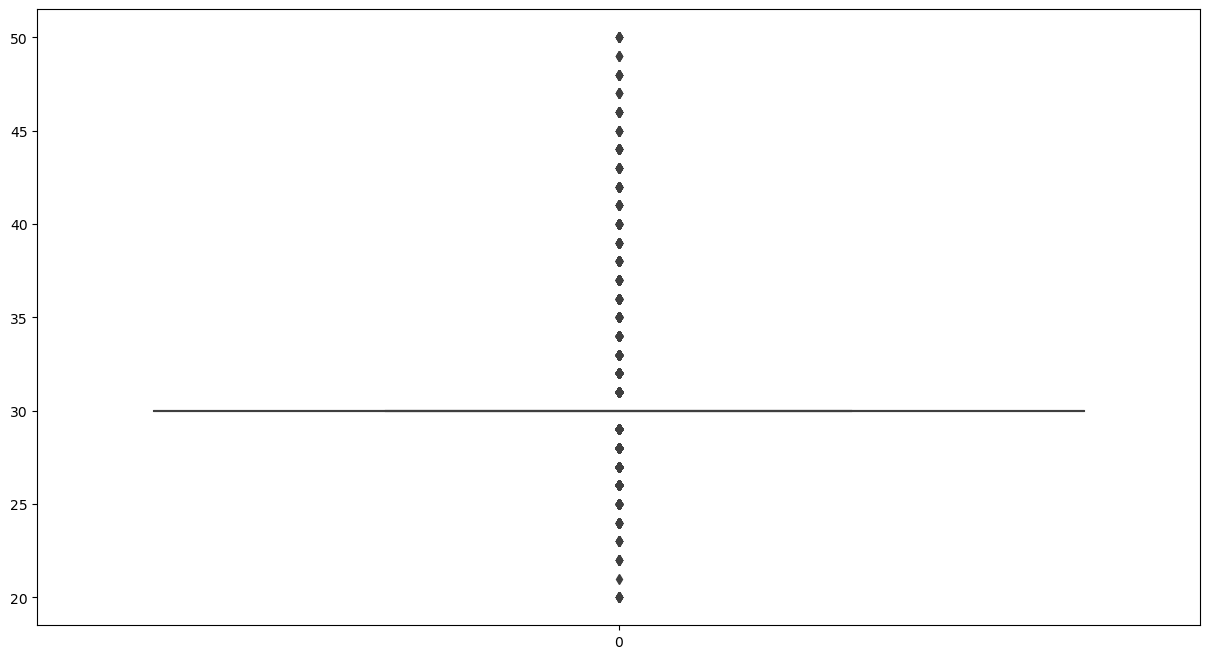

In [265]:
sns.boxplot(df.waist)
plt.show()

In [266]:
#bra size column
q1=numeric.bra_size.quantile(0.25)
q3=numeric.bra_size.quantile(0.75)
print(q1,q3)
iqr=q3-q1
print("IQR :", iqr)

maxv=q3+(iqr*2.5)
minv=q1-(iqr*2.5)
print("maxv : ",maxv,"\n","minv :",minv)
outliers=numeric[(numeric.bra_size<minv) | (numeric.bra_size>maxv)]
outliers

38.0 41.0
IQR : 3.0
maxv :  48.5 
 minv : 30.5


item_id  waist  size  quality  hips  bra_size  user_id  shoe_size  \
1       123373     31    13        3    30        30   587883          8   
8       123373     30    30        4    50        50   279568         11   
10      123373     30    24        4    49        49   205796          8   
11      123373     30    33        5    60        60   422613          8   
15      123373     30    27        4    50        50   780339          8   
...        ...    ...   ...      ...   ...       ...      ...        ...   
82720   807384     38    26        5    50        50   309314         10   
82727   807384     30    32        3    55        55   202387          8   
82730   807384     30    20        3    54        54   461021          8   
82741   807384     30    26        4    50        50    17514          8   
82763   807722     30     8        5    30        30   747277          5   

       height_encoded  
1            0.094071  
8            0.033238  
10           0.145575  
11           0.146028  
15           0.146028  
...               ...  
82720        0.007713  
82727        0.145575  
82730        0.146028  
82741        0.145575  
82763        0.043718  

[6529 rows x 9 columns]

<Axes: >

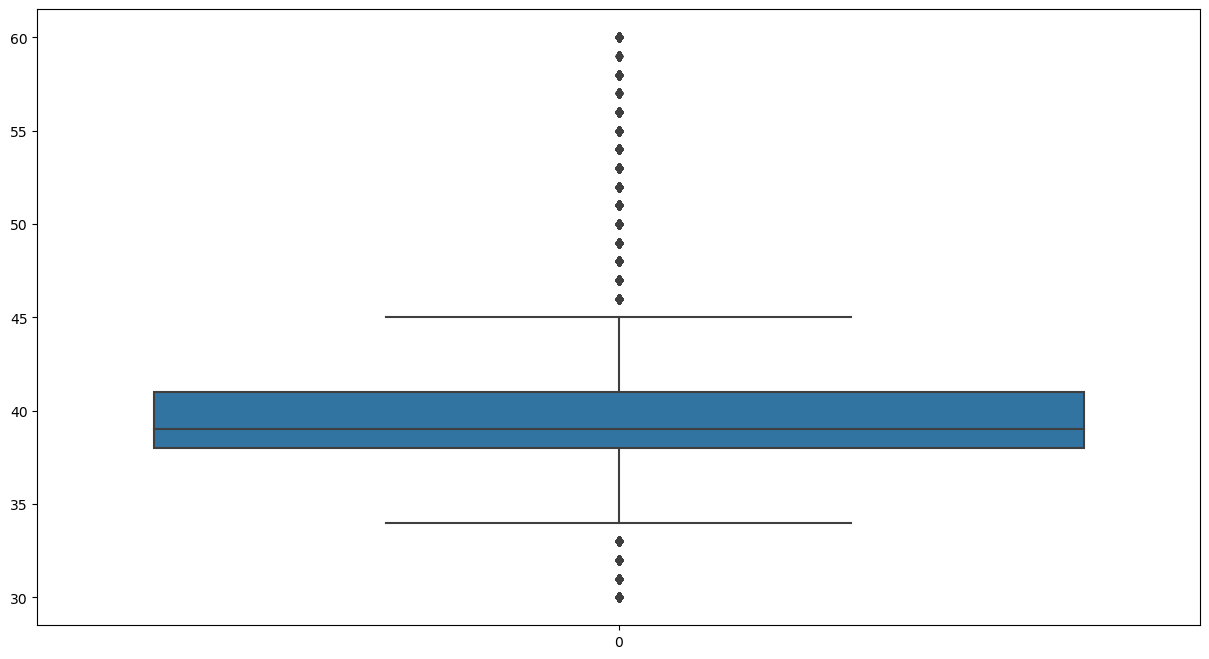

In [267]:
sns.boxplot(numeric.bra_size)

In [268]:
#shoe size column
q1=numeric.shoe_size.quantile(0.25)
q3=numeric.shoe_size.quantile(0.75)
print(q1,q3)
iqr=q3-q1
print("IQR :", iqr)

maxv=q3+(iqr*2.5)
minv=q1-(iqr*2.5)
print("maxv : ",maxv,"\n","minv :",minv)
outliers=numeric[(numeric.shoe_size<minv) | (numeric.shoe_size>maxv)]
outliers

8.0 8.0
IQR : 0.0
maxv :  8.0 
 minv : 8.0


item_id  waist  size  quality  hips  bra_size  user_id  shoe_size  \
2       123373     30     7        2    39        39   395665          9   
8       123373     30    30        4    50        50   279568         11   
9       123373     30    13        5    41        41   950172          9   
21      123373     30     5        5    39        39     4905          7   
22      123373     30     7        4    34        34   133370          9   
...        ...    ...   ...      ...   ...       ...      ...        ...   
82775   807722     30    12        4    40        40   808373          9   
82779   807722     30    12        4    38        38   370303          7   
82781   807722     30    12        5    40        40    11806          6   
82783   807722     30     4        5    34        34   432480          6   
82784   807722     30     4        3    35        35   317420          6   

       height_encoded  
2            0.112153  
8            0.033238  
9            0.145575  
21           0.112153  
22           0.055997  
...               ...  
82775        0.146028  
82779        0.112153  
82781        0.145575  
82783        0.094071  
82784        0.043718  

[20101 rows x 9 columns]

<Axes: >

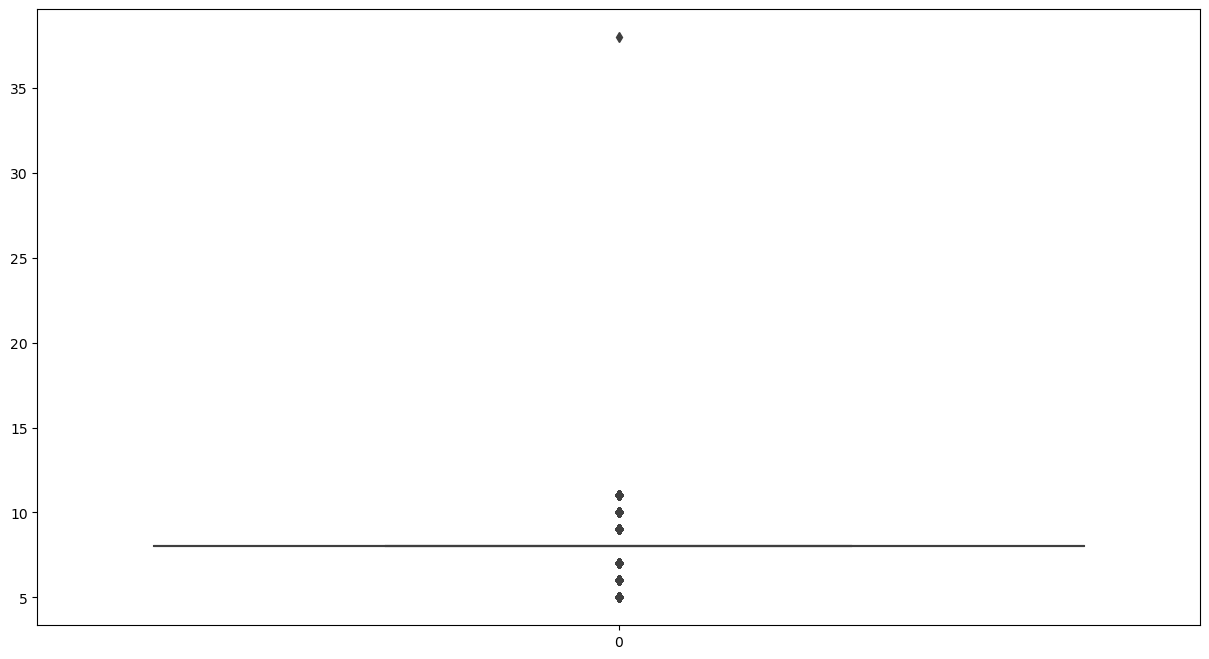

In [269]:
sns.boxplot(numeric.shoe_size)

In [270]:
#hips column
q1=numeric.hips.quantile(0.25)
q3=numeric.hips.quantile(0.75)
print(q1,q3)
iqr=q3-q1
print("IQR :", iqr)

maxv=q3+(iqr*2.5)
minv=q1-(iqr*2.5)
print("maxv : ",maxv,"\n","minv :",minv)
outliers=numeric[(numeric.hips<minv) | (numeric.hips>maxv)]
outliers

38.0 41.0
IQR : 3.0
maxv :  48.5 
 minv : 30.5


item_id  waist  size  quality  hips  bra_size  user_id  shoe_size  \
1       123373     31    13        3    30        30   587883          8   
8       123373     30    30        4    50        50   279568         11   
10      123373     30    24        4    49        49   205796          8   
11      123373     30    33        5    60        60   422613          8   
15      123373     30    27        4    50        50   780339          8   
...        ...    ...   ...      ...   ...       ...      ...        ...   
82720   807384     38    26        5    50        50   309314         10   
82727   807384     30    32        3    55        55   202387          8   
82730   807384     30    20        3    54        54   461021          8   
82741   807384     30    26        4    50        50    17514          8   
82763   807722     30     8        5    30        30   747277          5   

       height_encoded  
1            0.094071  
8            0.033238  
10           0.145575  
11           0.146028  
15           0.146028  
...               ...  
82720        0.007713  
82727        0.145575  
82730        0.146028  
82741        0.145575  
82763        0.043718  

[6529 rows x 9 columns]

<Axes: >

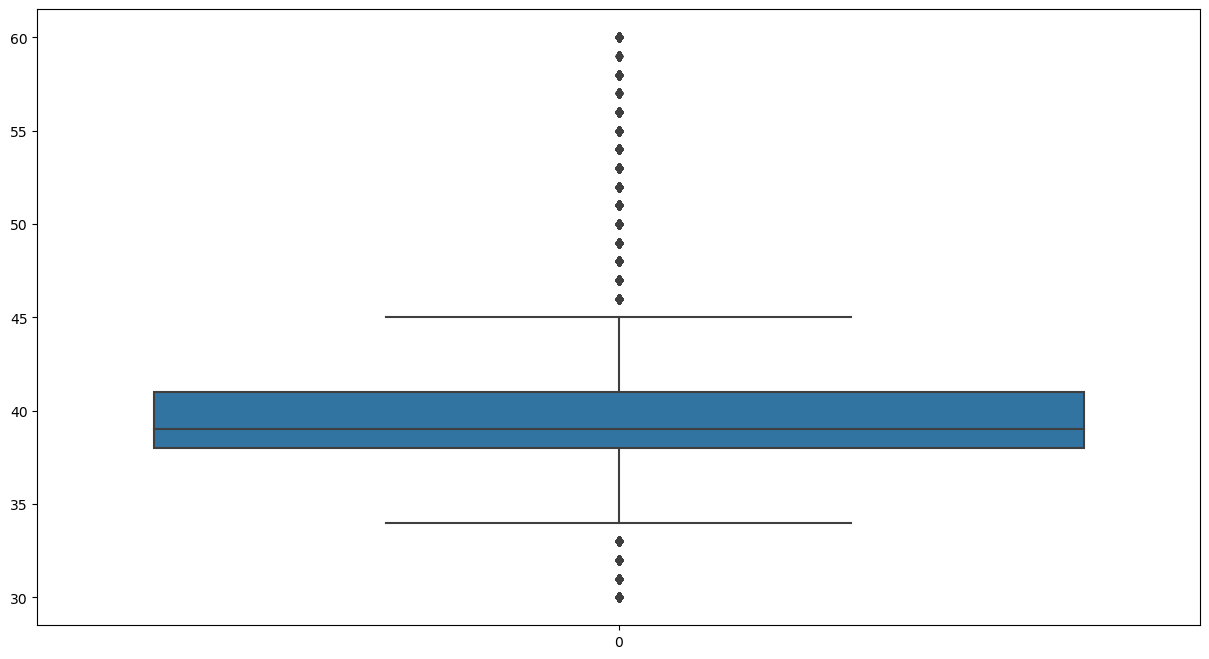

In [271]:
sns.boxplot(numeric.hips)

 6. 
Check for the category dress review and visualize the top 10 reviews using any 
relevant plot. Identify the negative reviews if there are any.


In [272]:
df.review_text.value_counts()


review_text
Love it!                                                                                                                                                                                                                                                   6878
Love it                                                                                                                                                                                                                                                      81
.                                                                                                                                                                                                                                                            76
Perfect!                                                                                                                                                                                                                    

In [273]:
df["review_text_encode"]=df.review_text.map(df.review_text.value_counts())
df.review_text_encode

0        6878
1        6878
2        6878
3        6878
4        6878
         ... 
82785       1
82786       1
82787       1
82788       1
82789       1
Name: review_text_encode, Length: 82790, dtype: int64

In [274]:
quality_rating=df.sort_values(by="quality",ascending=False)
quality_rating["review_summary"].unique()

array(['Love it!', "I love this sweater! It's",
       'I seriously love this top', ..., 'Sadly disappointed. Altho',
       'the material was strangel', 'This was a cardigan I was'],
      dtype=object)

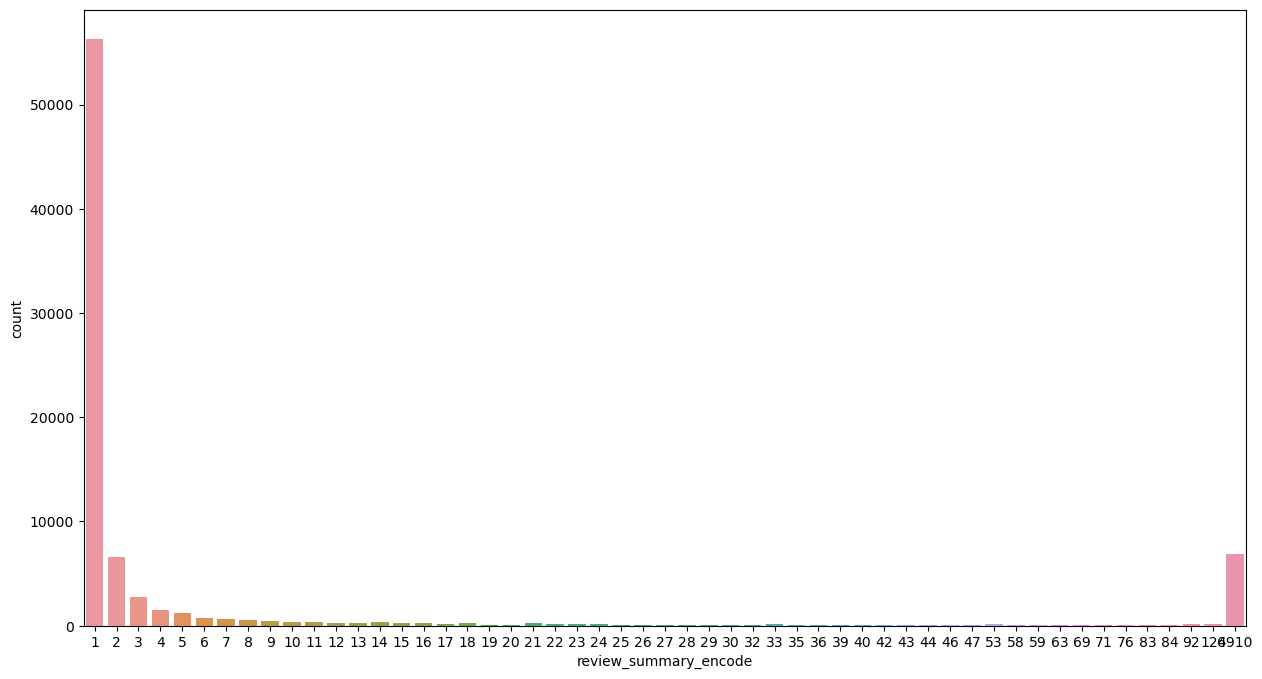

In [275]:
df["review_summary_encode"]=df.review_summary.map(df.review_summary.value_counts())
sns.countplot(data=df,x="review_summary_encode")
plt.show()

Find out the average shoe size for the different fits of the customer. Visualize 
using any relevant plot. Explain that, Is there any significant different shoe sizes for 
different fits?

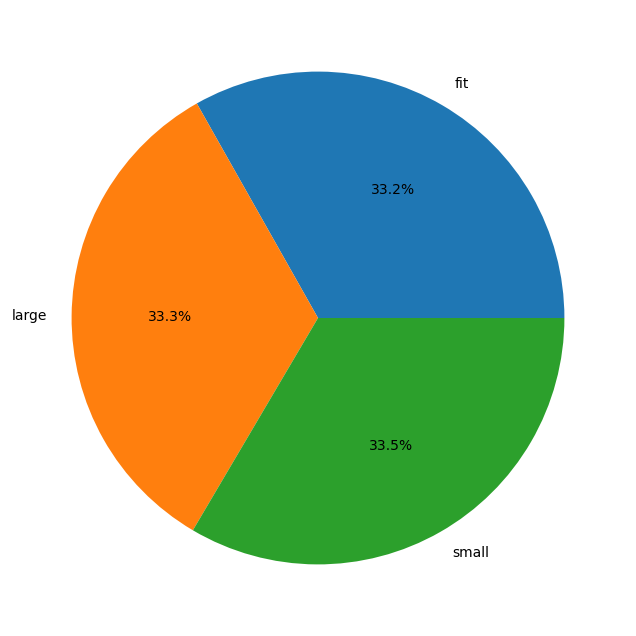

In [276]:
fit=df.groupby(by="fit")["shoe_size"].mean().to_frame().reset_index()
fit
plt.pie(fit["shoe_size"],labels=fit.fit,autopct="%1.1f%%")
plt.show()

In [277]:
fit  # yes significant shoe size for different fits

fit  shoe_size
0    fit   7.957521
1  large   7.995559
2  small   8.027825

Identify the customer’s common shoe width and average size for those who 
purchased the maximum quality. Is the mode of shoe width affect the user review?
Visualize using the appropriate plot.

average shoe size for maximum quality and commom shoe width : 7.95693658395008


<Axes: xlabel='shoe_size', ylabel='Count'>

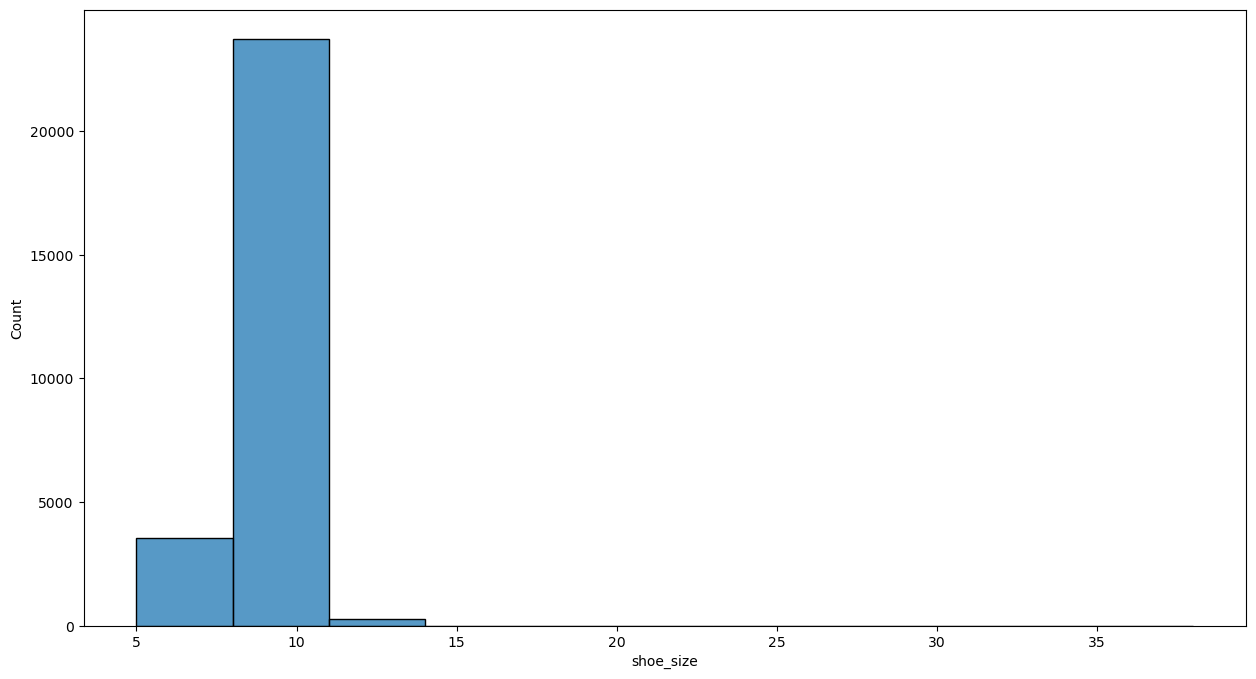

In [278]:
max_quality=df[(df.quality==5) & (df.shoe_width=="average")]
print("average shoe size for maximum quality and commom shoe width :",max_quality["shoe_size"].mean())
sns.histplot(max_quality.shoe_size,bins=10,binwidth=3)

In [279]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["shoe_width_encode"]=label_encoder.fit_transform(df.shoe_width)
cmat=pd.crosstab(df.shoe_width_encode,df.review_summary_encode)
cmat

review_summary_encode   1     2     3     4     5     6     7     8     9     \
shoe_width_encode                                                              
0                      52439  6097  2588  1424  1084   712   642   543   414   
1                       1102   130    39    31    34    16    12     6     8   
2                       2759   319   139    69    47    40    25    27    19   

review_summary_encode  10    ...  59    63    69    71    76    83    84    \
shoe_width_encode            ...                                             
0                       323  ...    55    60    66    63    76    81    81   
1                         4  ...     2     0     2     0     0     0     0   
2                        13  ...     2     3     1     8     0     2     3   

review_summary_encode  92    124   6910  
shoe_width_encode                        
0                       171   117  6499  
1                         1     2   109  
2                        12     5   302  

[3 rows x 53 columns]

In [284]:
df.shoe_width.value_counts()

shoe_width
average    77280
wide        3958
narrow      1552
Name: count, dtype: int64

In [285]:
df.review_summary.value_counts()

review_summary
Love it!                     6910
I absolutely love this dr     124
I really wanted to love t      92
Love it                        92
I love this dress so much      84
                             ... 
Cute! Good material.            1
Love it! Have it in two c       1
I would size up. A little       1
Wish it didn't pill under       1
I love this piece. I'm re       1
Name: count, Length: 61713, dtype: int64

<Axes: xlabel='review_summary_encode', ylabel='count'>

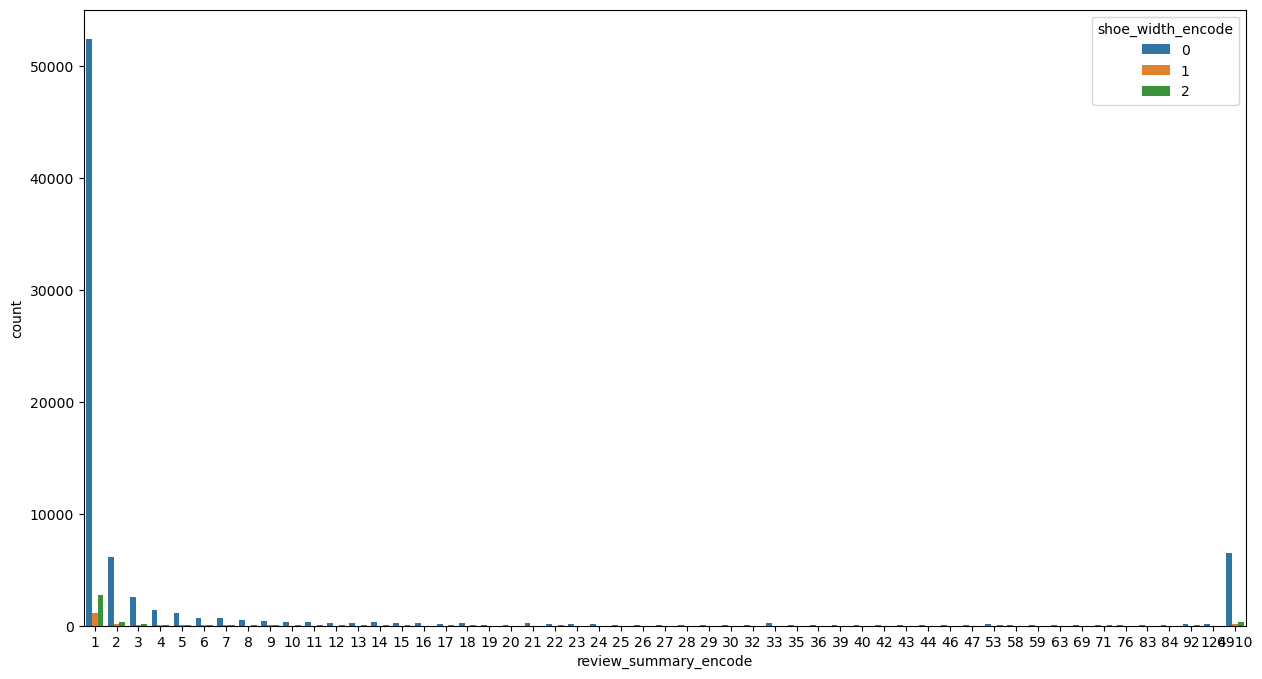

In [282]:
sns.countplot(x=df.review_summary_encode,hue=df.shoe_width_encode)  # most common shoe width is avearge(value 1),which has
# good review

Extract the records belonging to the top 10 reviews, and then find the review 
summary for the different cup sizes. The basic analysis explains what you would try to 
infer. Try to use visualization

In [288]:
max_quality[["review_text"]].head(10)

review_text
0     Love it!
3     Love it!
4     Love it!
5     Love it!
7     Love it!
9     Love it!
11    Love it!
12    Love it!
14    Love it!
16    Love it!

In [292]:
df[["cup_size","review_summary"]].groupby(["cup_size","review_summary"]).size().reset_index()


cup_size             review_summary  0
0            a  #ReviewContest this skirt  1
1            a  *FINALLY* Modcloth carrie  1
2            a                          .  7
3            a                        ...  1
4            a  ...It just arrived today!  1
...        ...                        ... ..
68573        k  probably one of my favori  1
68574        k   these were way to small.  1
68575        k   this fits perfectly, but  1
68576        k   this is my third charter  1
68577        k  this shirt is actually ba  1

[68578 rows x 3 columns]

In [312]:
df.review_summary.value_counts()

review_summary
Love it!                     6910
I absolutely love this dr     124
I really wanted to love t      92
Love it                        92
I love this dress so much      84
                             ... 
Cute! Good material.            1
Love it! Have it in two c       1
I would size up. A little       1
Wish it didn't pill under       1
I love this piece. I'm re       1
Name: count, Length: 61713, dtype: int64

In [311]:
df.cup_size.value_counts()

cup_size
c         24625
d         16149
b         14628
dd/e      12557
ddd/f      6117
a          4791
dddd/g     2008
h          1042
aa          296
j           200
i           189
k           188
Name: count, dtype: int64

In [309]:
df.cup_size_encode.value_counts()

cup_size_encode
3     24625
4     16149
2     14628
5     12557
6      6117
0      4791
7      2008
8      1042
1       296
10      200
9       189
11      188
Name: count, dtype: int64

In [310]:
df.review_summary_encode.value_counts()

review_summary_encode
1       56300
6910     6910
2        6546
3        2766
4        1524
5        1165
6         768
7         679
8         576
9         441
10        340
11        330
14        308
12        264
13        260
15        225
16        224
18        216
21        210
33        198
92        184
22        176
23        161
53        159
124       124
24        120
17        119
19         95
43         86
84         84
83         83
76         76
71         71
69         69
32         64
63         63
20         60
59         59
58         58
29         58
28         56
27         54
26         52
25         50
47         47
46         46
44         44
42         42
40         40
39         39
36         36
35         35
30         30
Name: count, dtype: int64

<Axes: xlabel='review_summary_encode', ylabel='cup_size_encode'>

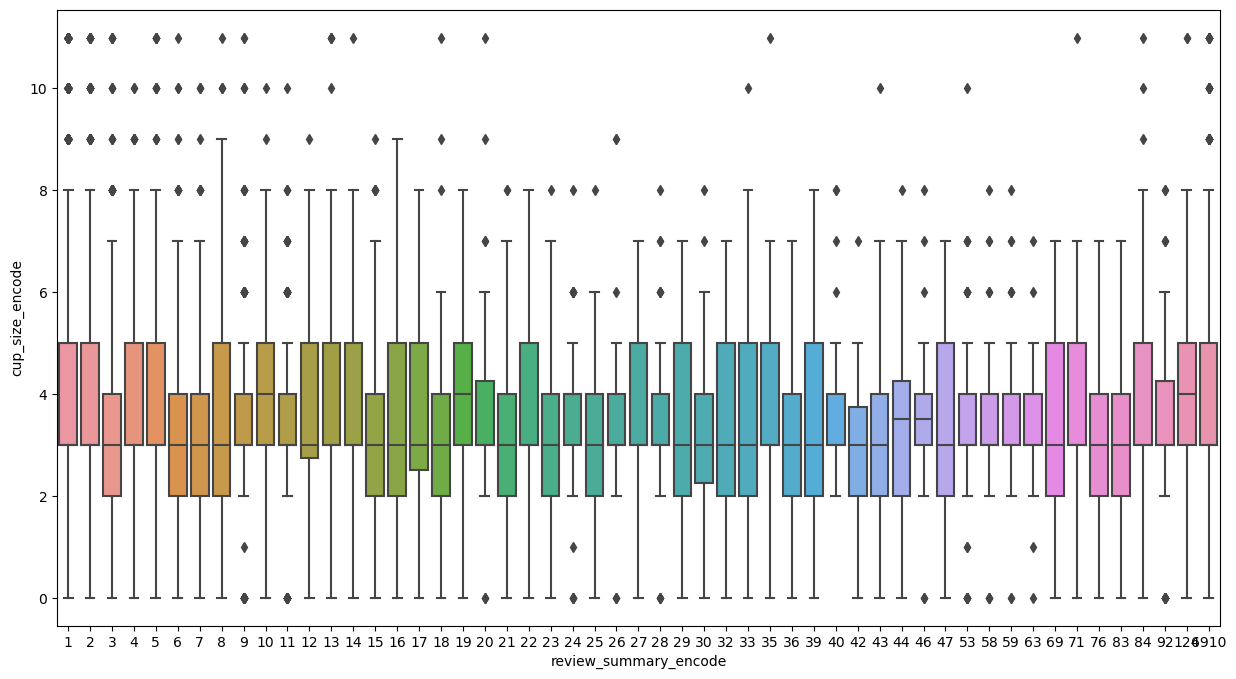

In [308]:
df["cup_size_encode"]=label_encoder.fit_transform(df.cup_size)
df.cup_size_encode.unique()

sns.boxplot(x=df.review_summary_encode,y=df.cup_size_encode)   # cupsize  >8(h,i,j,k) have got positive reviews
# cup size a has got decent ratings

Identify the most common review that we got from the customer whose hips size 
is greater than 35. Find out what kind of inference you can make

In [314]:
hip_size_35_above=df[(df.hips)>35]
hip_size_35_above.review_text.mode()   # most of the women love clothes that has hip size>35

0    Love it!
Name: review_text, dtype: object

What is the relationship between height and weight? Describe what kind of 
relationship it has.


In [ ]:
# no weight column

Plot the pair plot for the numerical plot. Explain according to your problem 
statement how the pair plot would help you.

In [317]:
numeric

item_id  waist  size  quality  hips  bra_size  user_id  shoe_size  \
0       123373     29     7        5    38        38   991571          8   
1       123373     31    13        3    30        30   587883          8   
2       123373     30     7        2    39        39   395665          9   
3       123373     30    21        5    39        39   875643          8   
4       123373     30    18        5    39        39   944840          8   
...        ...    ...   ...      ...   ...       ...      ...        ...   
82785   807722     30     8        4    39        39   727820          8   
82786   807722     30    12        5    39        39   197040          8   
82787   807722     30    12        5    36        36   102493          8   
82788   807722     30    12        4    39        39   756491          8   
82789   807722     30     4        4    39        39    78305          8   

       height_encoded  
0            0.145575  
1            0.094071  
2            0.112153  
3            0.112153  
4            0.094071  
...               ...  
82785        0.078597  
82786        0.115299  
82787        0.146028  
82788        0.106264  
82789        0.007713  

[82790 rows x 9 columns]

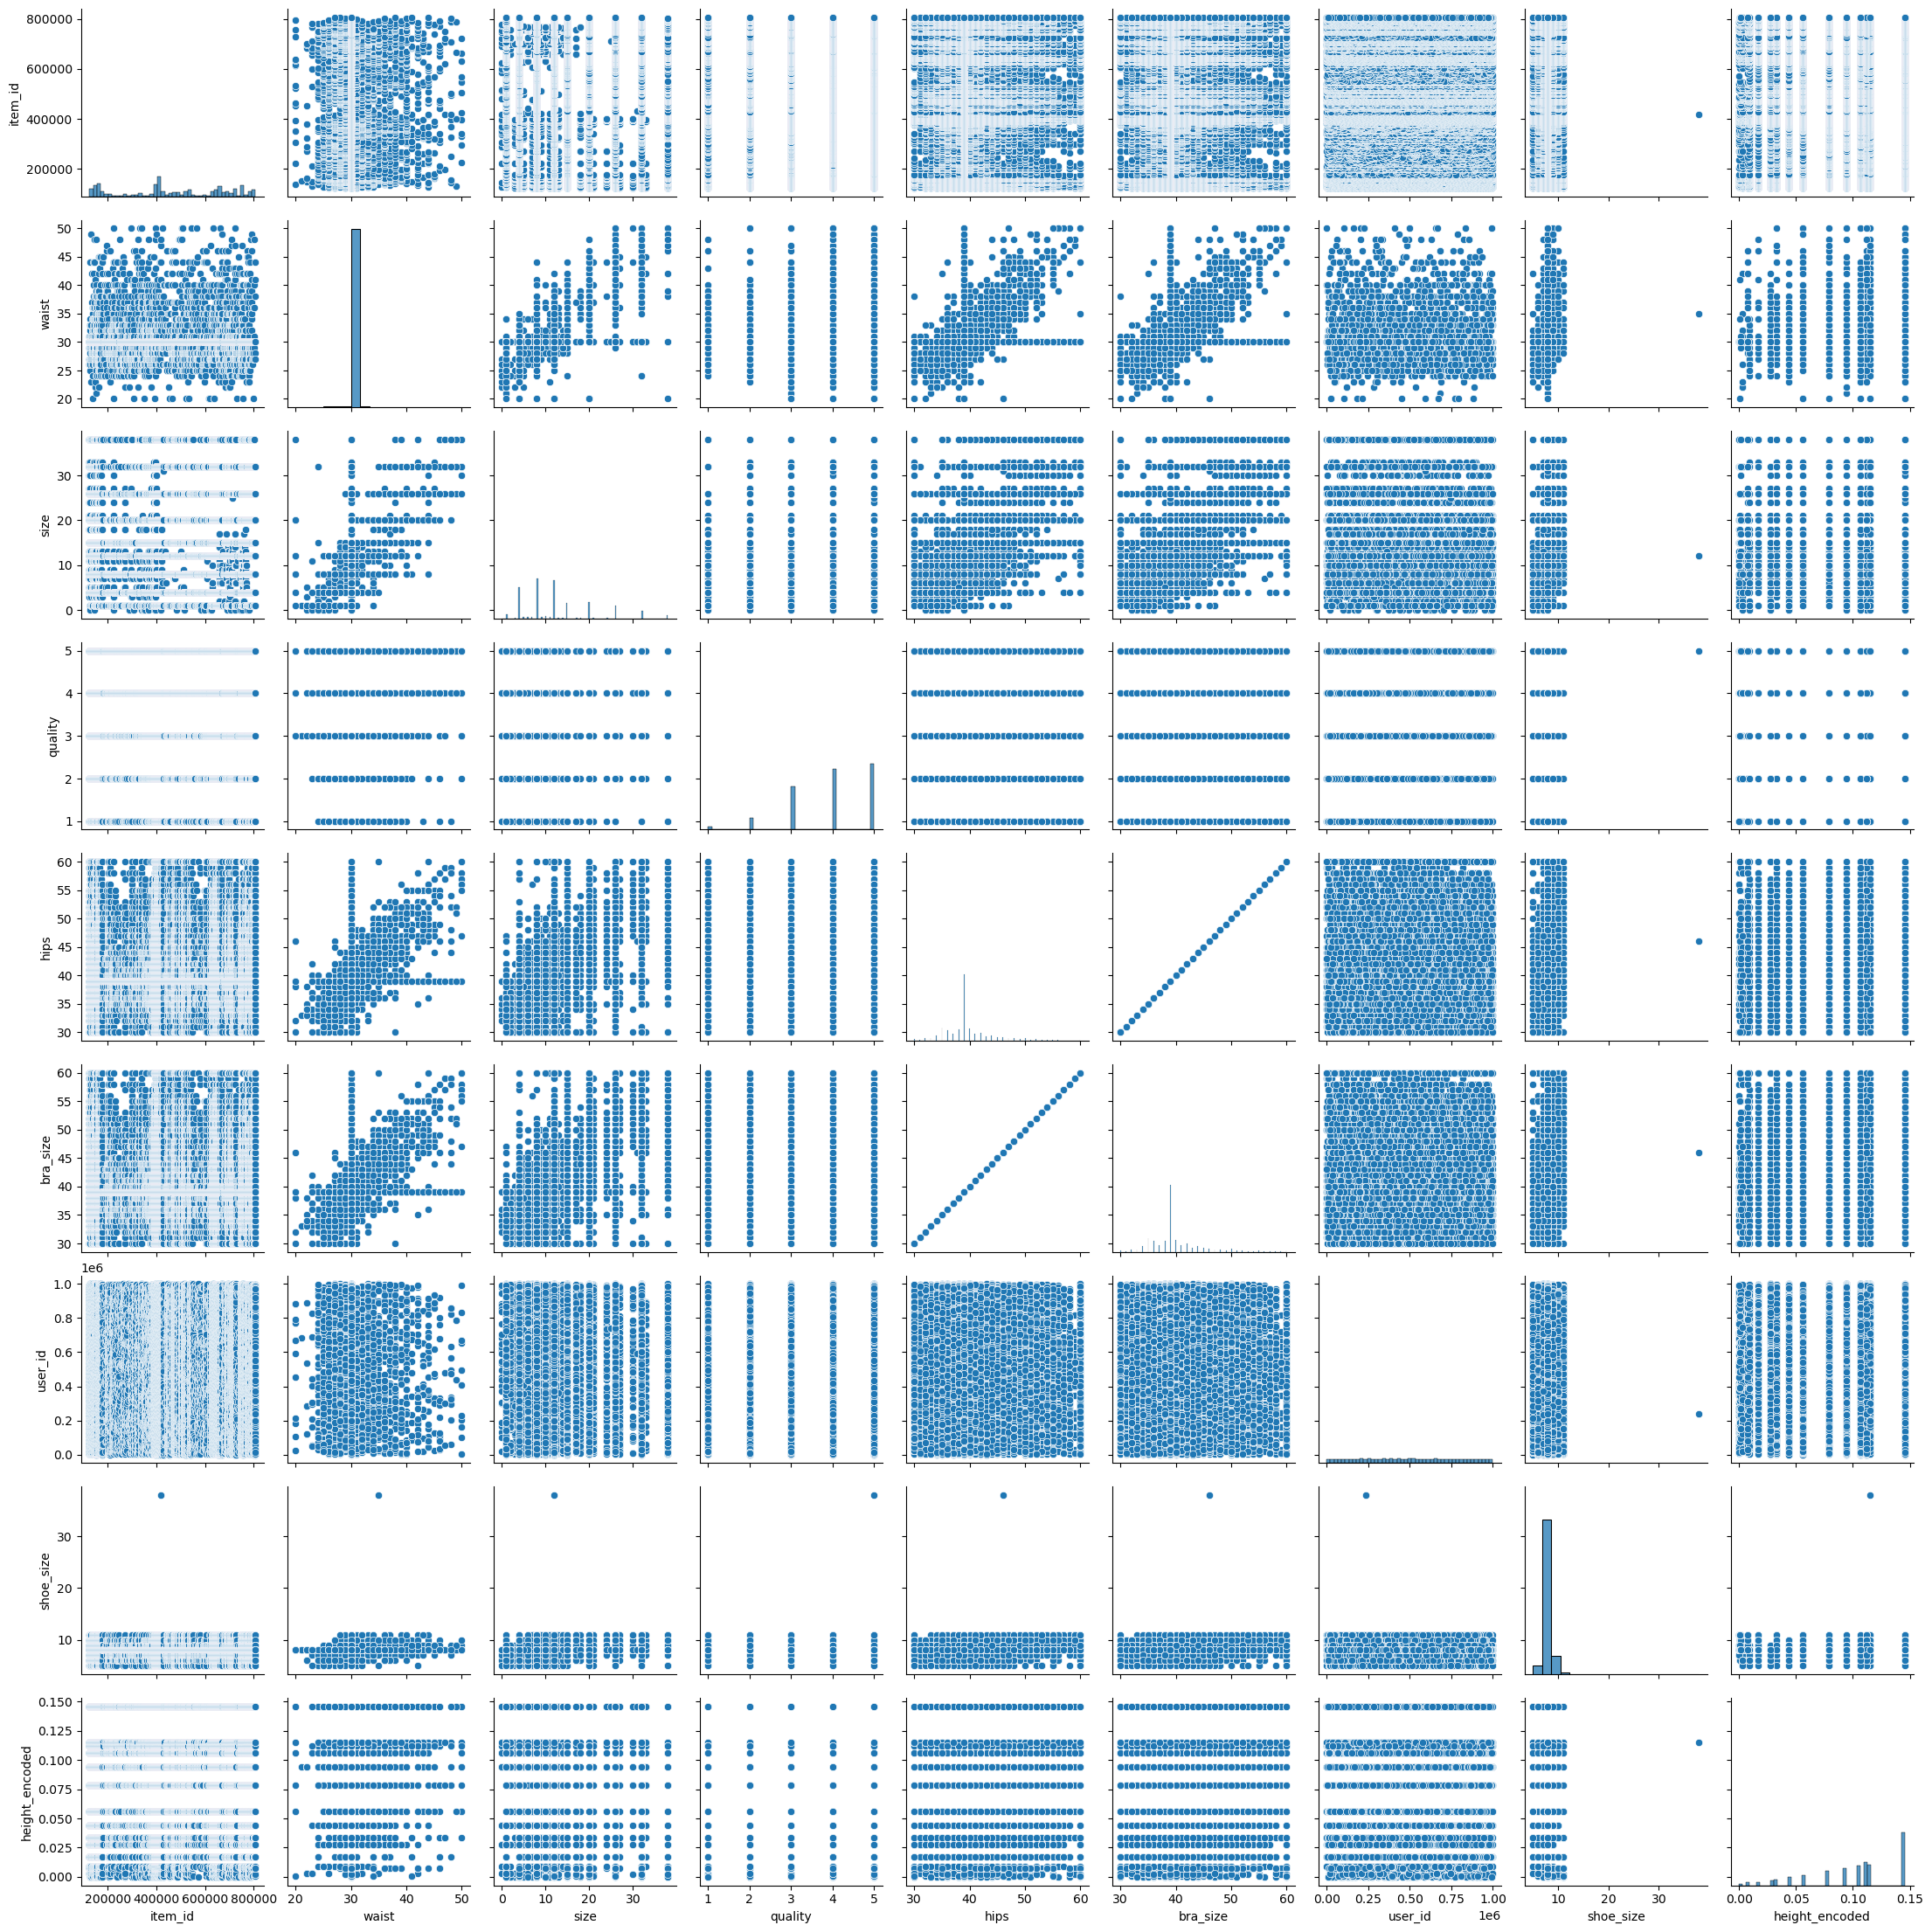

In [318]:
sns.pairplot(numeric)      # pair plot would help me to get relationship between numeric variables

# Statistical Analysis:


Test the claim that the category feature and review summary have any 
relationship among them. The level of significance is 5%

In [321]:
# chi2 contigency test
alpha=0.05
# h0: the categry and review_summary column are independent
# ha: the category and review summary column are dependent
cross=pd.crosstab(df.category,df.review_summary)
stats.chi2_contingency(cross)
statistic=428425.05922989716,
pvalue=0.0
result(pvalue,alpha)
# ha: the category and review summary column are dependent


 Reject h0


Test statistically whether the size and hips have any relationship using 0.05 
alpha. Before the above test, Test the normality test.

<Axes: xlabel='size', ylabel='hips'>

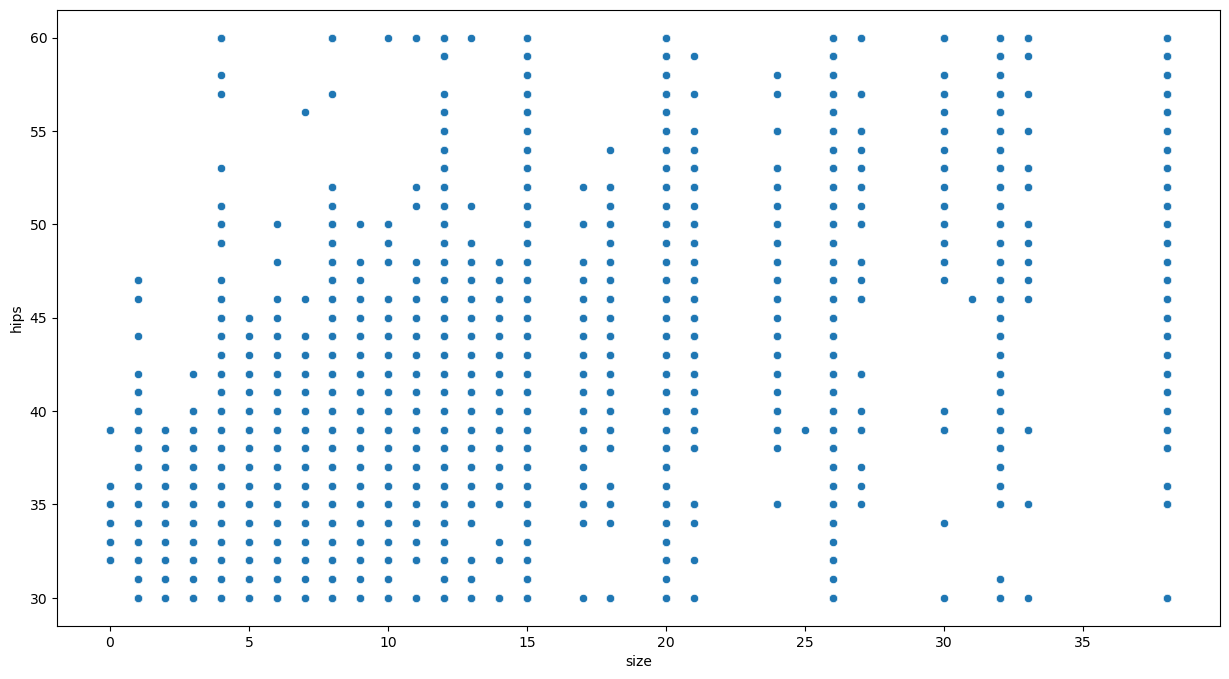

In [325]:
sns.scatterplot(x=df["size"],y=df.hips)

In [331]:
# test of normality
alpha=0.05
print(stats.shapiro(df["size"]))
print(stats.shapiro(df.hips))           # both of the data are not normal still proceeding
# levens test
print(stats.levene(df["size"],df.hips)) # both variance are not equal still proceeding

# h0: there is significant relationship between size and hips(mu1=mu2)
# ha: there is no significant relationship between hips and size(mu1!=mu2)

from statsmodels.stats import weightstats as stests
zstat,pval=stests.ztest(x1=df["size"],x2=df.hips)
print(zstat,pval)
result(pval,alpha)
# ha:hence there is no significant relationship between hips and size(mu1!=mu2)


ShapiroResult(statistic=0.8812057971954346, pvalue=0.0)
ShapiroResult(statistic=0.8664804100990295, pvalue=0.0)
LeveneResult(statistic=16593.347331560308, pvalue=0.0)
-818.489587440049 0.0
 Reject h0


In [333]:
# since data is not normal testing non parametric test
tstat,pval=stats.mannwhitneyu(df["size"],df.hips)
print(tstat,pval)

38716171.5 0.0


Does the quality significantly differ for any one shoe width? Test the test with 
96%confidence intervals.

In [347]:
# oneway anova

# h0: all shoe width have same quality
# ha: atleast one shoe width quality differs
alpha=0.04

s1=df[(df.shoe_width)=="average"]["quality"]
s2=df[(df.shoe_width)=="wide"]["quality"]
s3=df[(df.shoe_width)=="narrow"]["quality"]

# test of normality
print(stats.shapiro(s1))
print(stats.shapiro(s2))
print(stats.shapiro(s3))       # data not normal but still proceeding

# test of variance
print(stats.levene(s1,s2,s3))     # all variance are equal

# one way anova test
fstat,pval=stats.f_oneway(s1,s2,s3)
print(fstat,pval)
result(pval,alpha)
# h0: all shoe width have same quality


ShapiroResult(statistic=0.8494734764099121, pvalue=0.0)
ShapiroResult(statistic=0.848324179649353, pvalue=0.0)
ShapiroResult(statistic=0.8366060256958008, pvalue=3.396777072946923e-37)
LeveneResult(statistic=0.9205301011593957, pvalue=0.3983119184688344)
2.2965953956192084 0.1006071763914662
fail to reject h0


Check if the shoe width feature affects the review summary with a 99% 
confidence interval

In [353]:
# chi2 contigency test
# h0: both shoe width and review summary are independent
# ha: both show width and review summary are dependent

alpha=0.01

cross=pd.crosstab(df.shoe_width,df.review_summary)
cross
stats.chi2_contingency(cross)
zstat=129510.89002085809, 
pvalue=8.929642565661796e-34
result(pvalue,alpha)
# ha: both show width and review summary are dependent


 Reject h0


Check if the length feature affects the review summary with a 95% confidence
interval.

In [357]:
# chi2 contigency test
# h0: both length and review summary are independent
# ha: both length  and review summary are dependent

alpha=0.05

cross=pd.crosstab(df.length,df.review_summary)
cross
stats.chi2_contingency(cross)
statistic=265422.836206021
pvalue=4.266157008823606e-147
result(pvalue,alpha)
# ha: both length and review summary are dependent


 Reject h0


Does the average quality significantly differ for the different fits? Kindly test the 
relevant hypothesis test by having 0.05 alpha.
Check the normality of the data before the above test. Alpha = .0

In [360]:
# one way anova
# oneway anova

# h0: all fits have same quality
# ha: atleast one fit quality differs
alpha=0.05

s1=df[(df.fit)=="fit"]["quality"]
s2=df[(df.fit)=="large"]["quality"]
s3=df[(df.fit)=="small"]["quality"]

# test of normality
print(stats.shapiro(s1))
print(stats.shapiro(s2))
print(stats.shapiro(s3))       # data not normal but still proceeding

# test of variance
print(stats.levene(s1,s2,s3))     # all variance are not  equal

# one way anova test
fstat,pval=stats.f_oneway(s1,s2,s3)
print(fstat,pval)
result(pval,alpha)
# h0: atleast one fit quality is different


ShapiroResult(statistic=0.8251420259475708, pvalue=0.0)
ShapiroResult(statistic=0.869010329246521, pvalue=0.0)
ShapiroResult(statistic=0.9018996357917786, pvalue=0.0)
LeveneResult(statistic=342.3436999889118, pvalue=8.57964985101422e-149)
2146.2393752903026 0.0
 Reject h0


# STATISTICS PART A

In [362]:
l1=[23,30, 20, 27, 44, 26, 35, 20, 29, 29,
25, 15, 18, 27, 19, 22, 12, 26, 34,15,
27, 35, 26, 43, 35, 14, 24, 12, 23, 31,
40, 35, 38, 57, 22, 42, 24, 21, 27, 33]


In [363]:

# Q1. Compute the mean, median and the mode of the data
mean=np.mean(l1)
median=np.median(l1)
mode=scipy.stats.mode(l1)
print("mean :",mean,"\n","median :",median,"\n","mode :",mode)

mean : 27.625 
 median : 26.5 
 mode : ModeResult(mode=27, count=4)


In [364]:
# Q2. Compute the range , variance and standard deviation of CEO ages
print("range :",max(l1)-min(l1), "\n", "variance :", np.var(l1),"\n","standard deviation :",np.std(l1))

range : 45 
 variance : 90.284375 
 standard deviation : 9.501809038283184


In [365]:
# Q3. Find the mean deviation for the data 
mean=np.mean(l1)
deviation=abs(l1-mean)
mean_deviation=np.mean(deviation)
print("mean deviation :",mean_deviation)

mean deviation : 7.4


In [366]:
# Q4.Calculate the Pearson coefficient of skewness and comment on the  skewness of the data
skew=pd.Series(l1).skew()
print("skew :",skew)
# highly positively skewed data, which tell than the more data is distributed from the mean on rightside

skew : 0.7225963053821992


In [367]:
# Count the number of data values that fall within 2 standard deviation of  the mean.
def diff(l1,negative_range,positive_range):
    count=0
    for i in l1:
        if i>negative_range and i<positive_range:
            count+=1
    print("the number  of values within first std deviation is :",count)
            
negative_range=np.mean(l1)-(2*np.std(l1))
positive_range=np.mean(l1)+(2*np.std(l1))
print(negative_range,positive_range)

diff(l1,negative_range,positive_range)




8.621381923433631 46.62861807656637
the number  of values within first std deviation is : 39


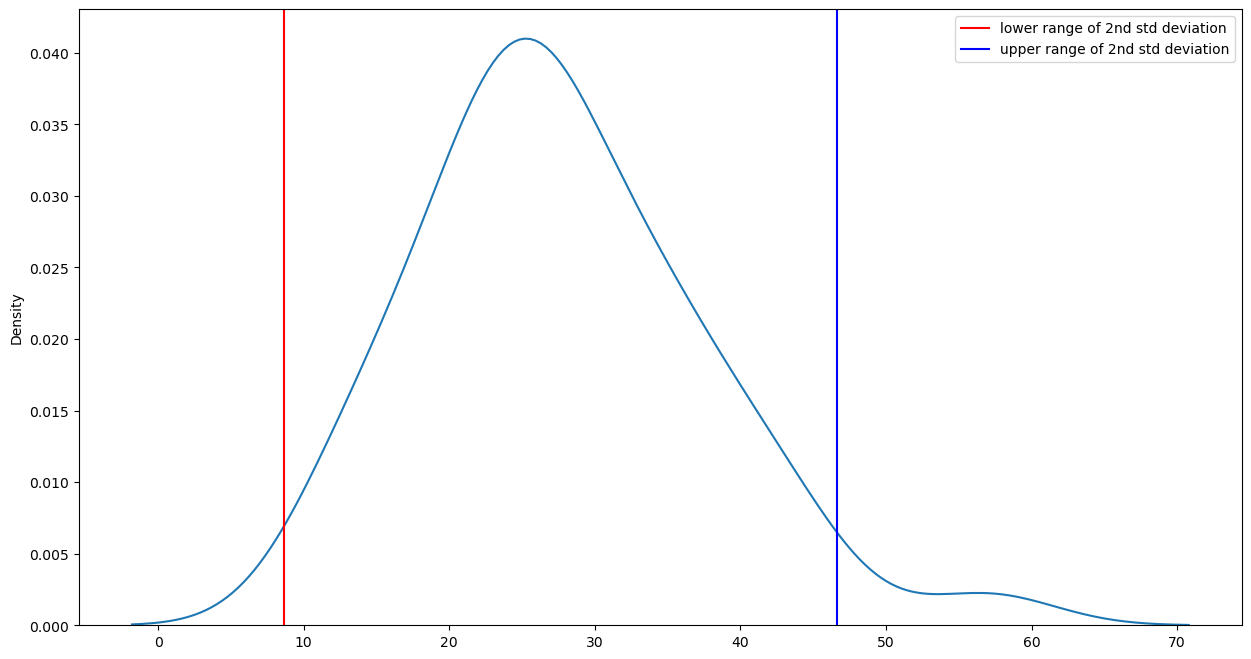

In [368]:
s1=pd.Series(l1)
sns.distplot(s1,kde=True,hist=False)
plt.axvline(negative_range,color="red",label="lower range of 2nd std deviation")
plt.axvline(positive_range,color="blue",label="upper range of 2nd std deviation")
plt.legend()
plt.show()

In [369]:
# Q6. Find the three quartiles and the interquartile range (IQR).
q1=s1.quantile(0.25)
q2=s1.quantile(0.50)
q3=s1.quantile(0.75)
iqr=q3-q1
print("iqr :",iqr)
print(q1,"\n",q2,"\n",q3)


iqr : 12.5
21.75 
 26.5 
 34.25


In [370]:
# Q7. Are there any outliers in the data set ?
a1 = q1 -1.5*iqr
b1 = q3+ 1.5*iqr
print(a1,b1)
l3=[]
for i in s1:
     if i<a1 or i>b1:
            l3.append(i)
print("outliers are :",l3)

3.0 53.0
outliers are : [57]


In [371]:
# Q8. Draw a boxplot of the dataset to confirm .
import plotly.express as px
px.box(s1)

In [372]:
# Q9. Find the percentile rank of the datapoint 25


nums=[57, 61, 57, 57, 58, 57, 61, 54, 68,
51, 49, 64, 50, 48, 65, 52, 56, 46,
54, 49, 50, 47, 55, 55, 54,42, 51,
56, 55, 54, 51, 60, 62, 43, 55, 56,
61, 52, 69, 64, 46, 54]
nums=sorted(nums)
count=0
for i in l1:
    if i<25:
        count+=1
print(count)
percentile=(count/len(l1))*100
print("the percentile rank of 50 is :", percentile)

16
the percentile rank of 50 is : 40.0


In [374]:
# Q10. Q10. What is the probability that a shirt is cost above 25 dollors?

# 1.test of normality
stats.shapiro(s1)
# framing hypothesis
# h0: the probability of a shirt does not cost>25 dollors(mu<=25)
# ha: the probability of a shirt costing above 25 dollors(mu>25)
alpha=0.05
mu=25
xbar=np.mean(s1)
sigma=np.std(s1)
n=len(s1)
zstat=(xbar-mu)/(sigma/np.sqrt(n))
pval=stats.norm.sf(zstat)
print(zstat,pval)
result(pval,alpha)
# ha: the probability of a shirt costing above 25 dollors(mu>25)


1.74724177774927 0.040297703838955715
 Reject h0


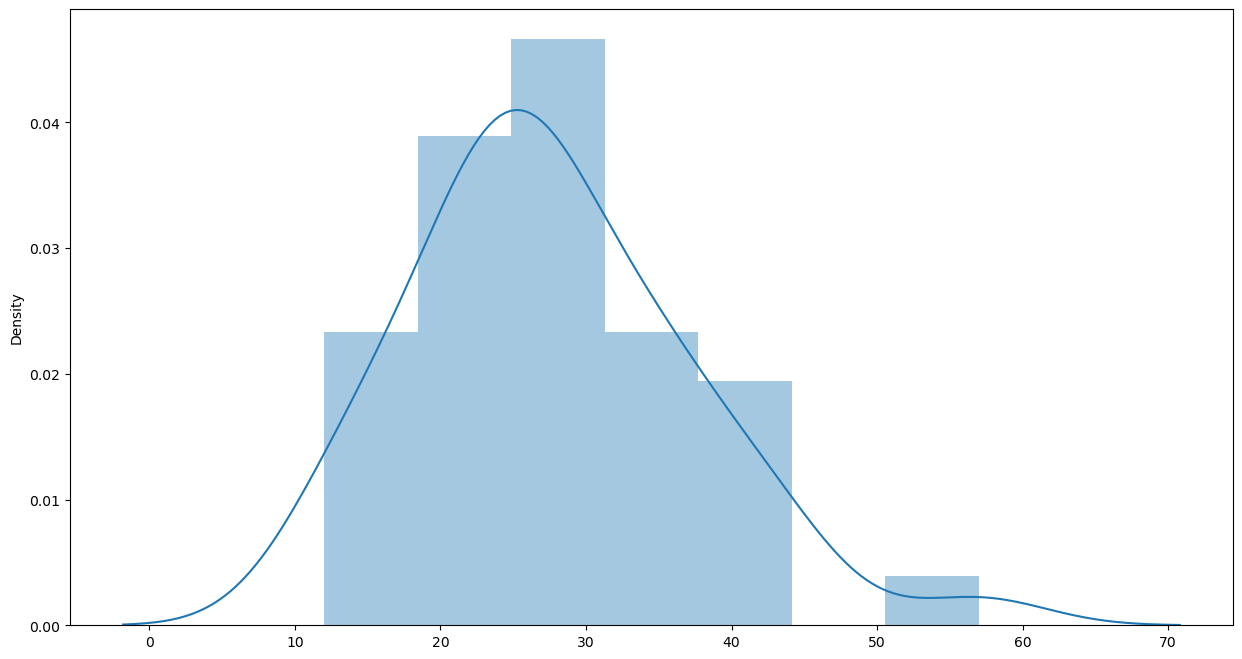

In [375]:
# Q11. Create a frequency distribution for the data and visualize it appropriately
sns.distplot(s1,hist=True,kde=True)
plt.show()

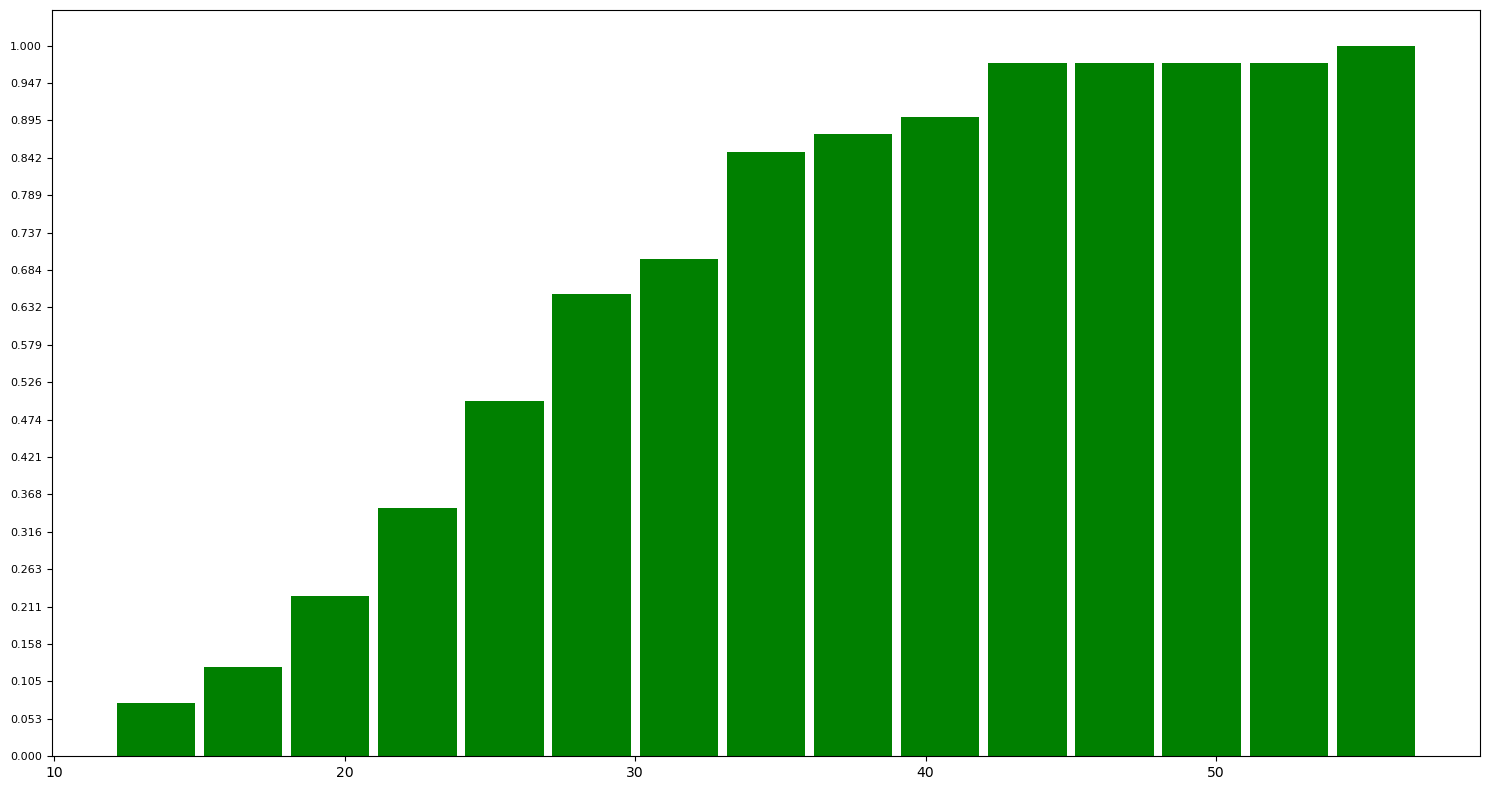

In [376]:
# Q12. Create a probability distribution of the data and visualize it appropriately. 
plt.hist(s1,bins=15,color="green",rwidth=0.9,cumulative=True,density=True)
plt.yticks(np.linspace(0,1,20),fontsize=8)
plt.tight_layout()
plt.show()



Q13. What is the shape of the distribution of this dataset? Create an 
appropriate graph to determine that. Take 100 random samples with 
replacement from this dataset of size 5 each. Create a sampling distribution of 
the mean shirt prices. Compare with other sampling distributions of sample 
size 10, 15, 20, 25, 30. State your observations. Does it corroborate the 
Central Limit Theorem

<Axes: ylabel='Density'>

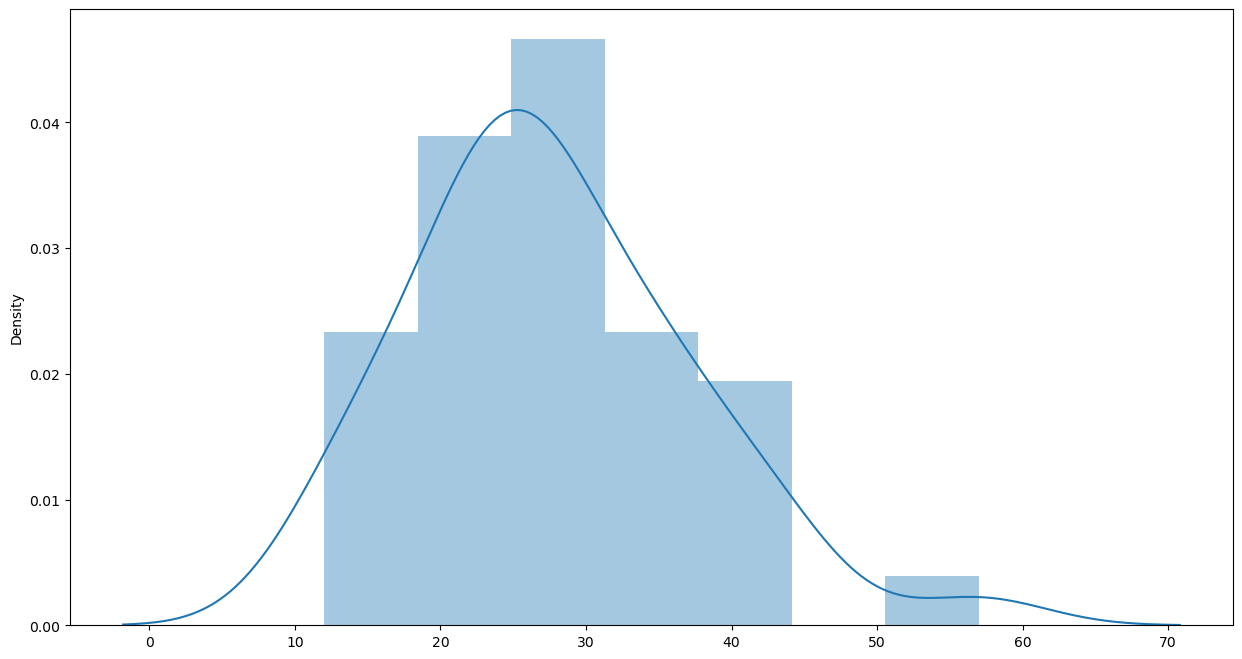

In [377]:
sns.distplot(s1,hist=True,kde=True)
# the shape of the distribution is right skewed with one peak(unimodel)

28.02772277227723
0.22514308907678054


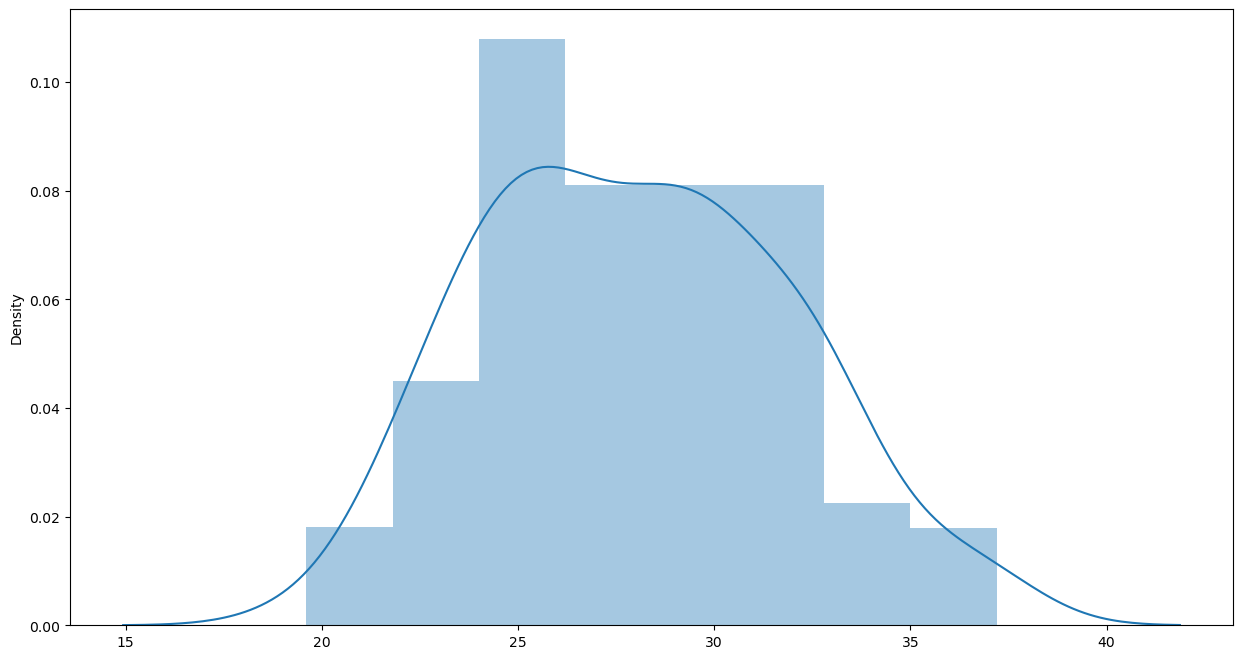

In [378]:
import random
random.seed(6)
list1=[]
for i in range(101):
    random_5=random.choices(population=s1,k=5)
    list1.append(np.mean(random_5))
sns.distplot(list1,kde=True,hist=True)
print(np.mean(list1))
s2=pd.Series(list1)
print(s2.skew())

27.71980198019802
0.17441148022284791


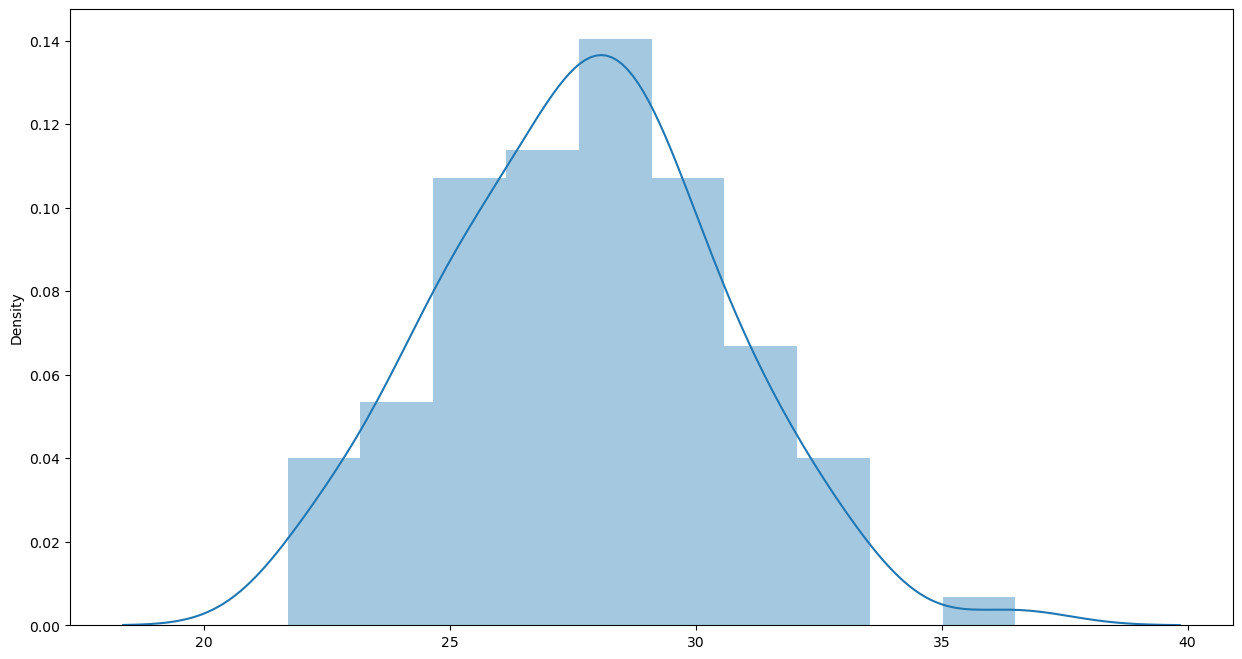

In [379]:
random.seed(6)
list2=[]
for i in range(101):
    random_10=random.choices(population=s1,k=10)
    list2.append(np.mean(random_10))
sns.distplot(list2,kde=True,hist=True)
print(np.mean(list2))
s3=pd.Series(list2)
print(s3.skew())

27.650825082508245
0.03269378690343214


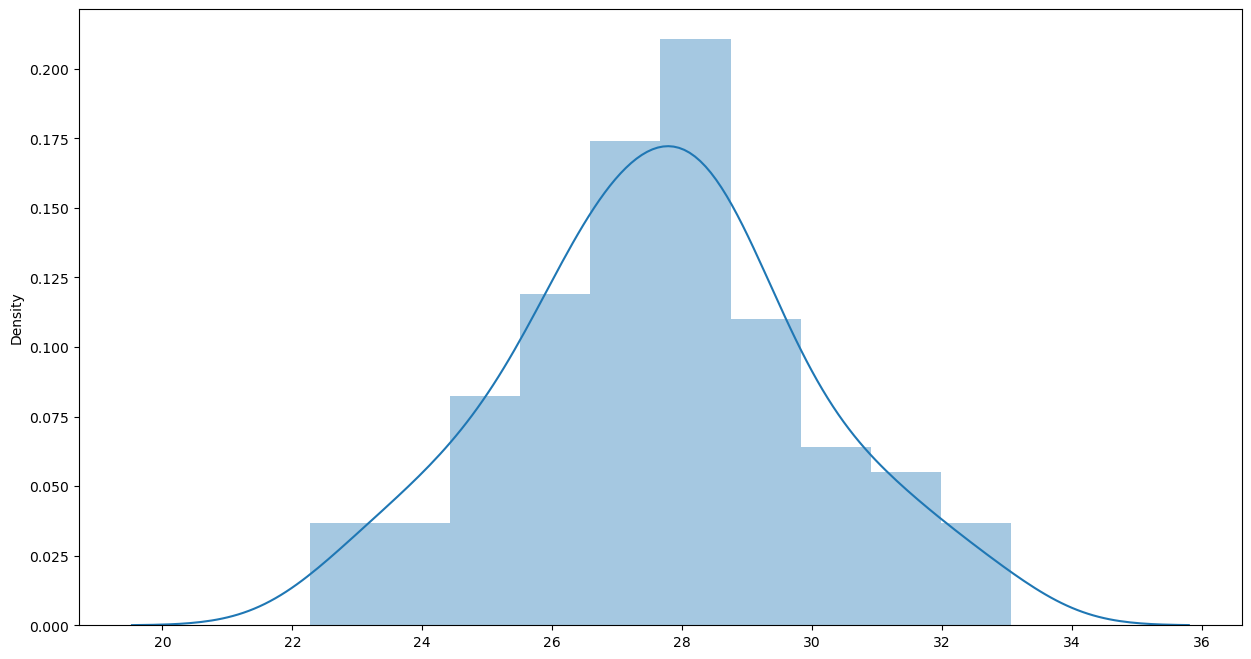

In [380]:
random.seed(6)
list3=[]
for i in range(101):
    random_15=random.choices(population=s1,k=15)
    list3.append(np.mean(random_15))
sns.distplot(list3,kde=True,hist=True)
print(np.mean(list3))
s4=pd.Series(list3)
print(s4.skew())

27.614356435643565
0.21110659690647357


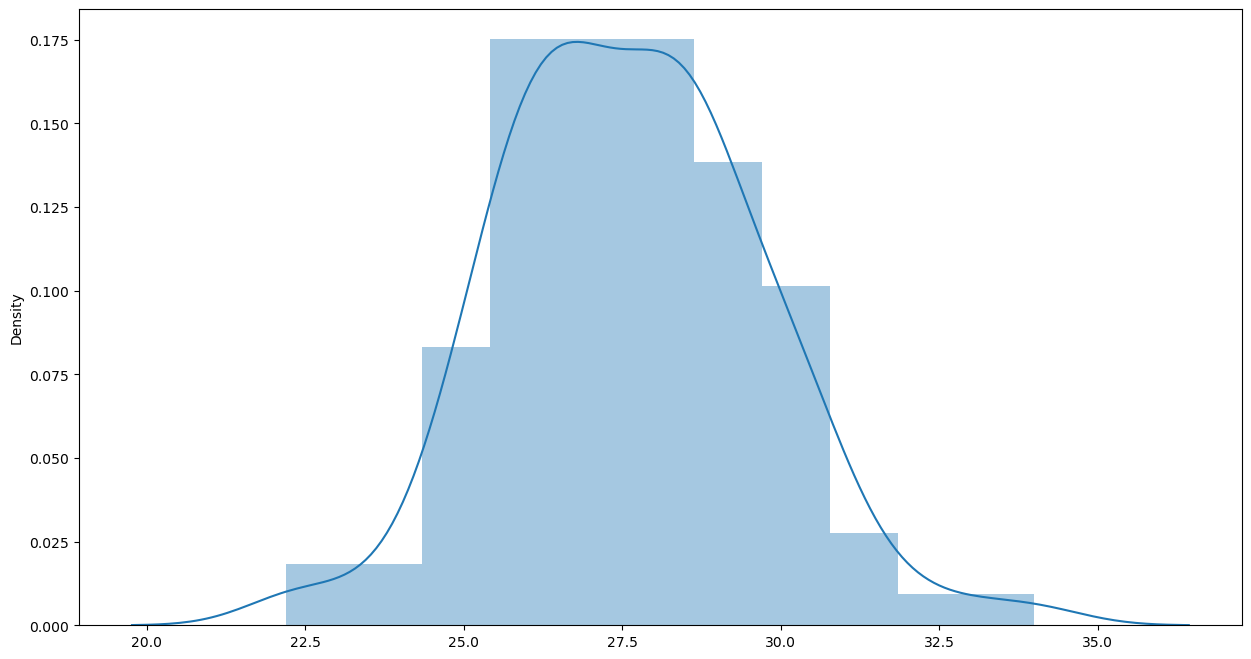

In [381]:
random.seed(6)
list4=[]
for i in range(101):
    random_20=random.choices(population=s1,k=20)
    list4.append(np.mean(random_20))
sns.distplot(list4,kde=True,hist=True)
print(np.mean(list4))
s5=pd.Series(list4)
print(s5.skew())

27.597227722772278
0.2702488605248538


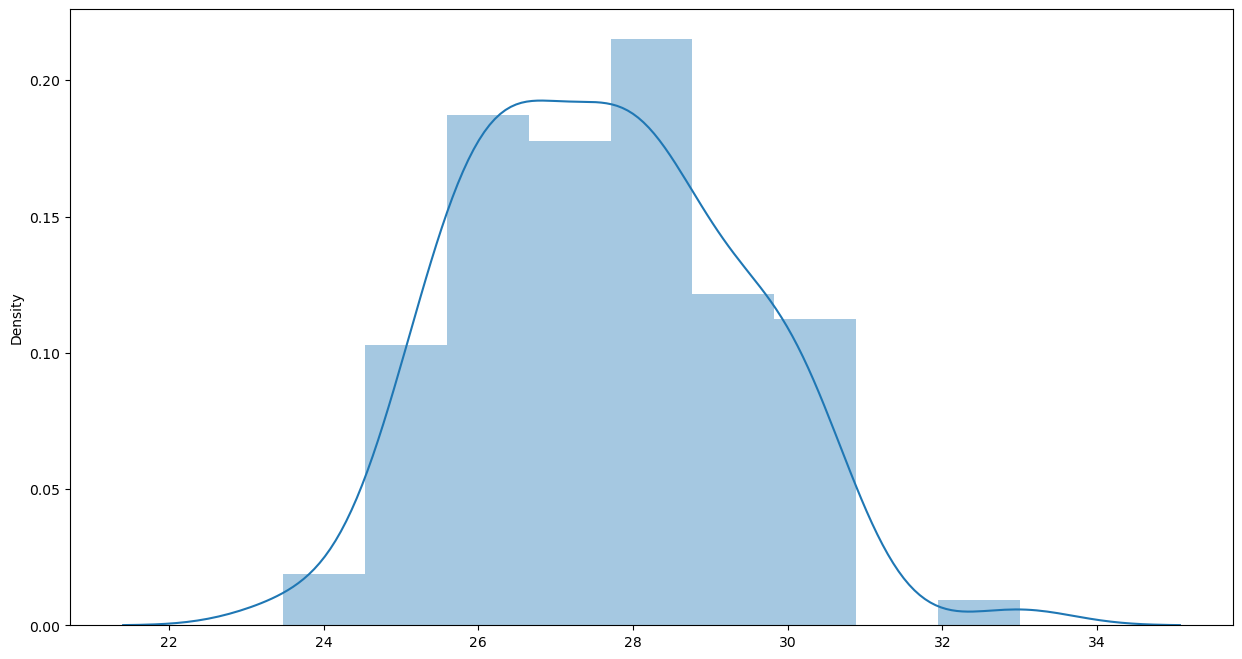

In [382]:
random.seed(6)
list5=[]
for i in range(101):
    random_25=random.choices(population=s1,k=25)
    list5.append(np.mean(random_25))
sns.distplot(list5,kde=True,hist=True)
print(np.mean(list5))
s6=pd.Series(list5)
print(s6.skew())

27.616831683168318
-0.025118537356984303


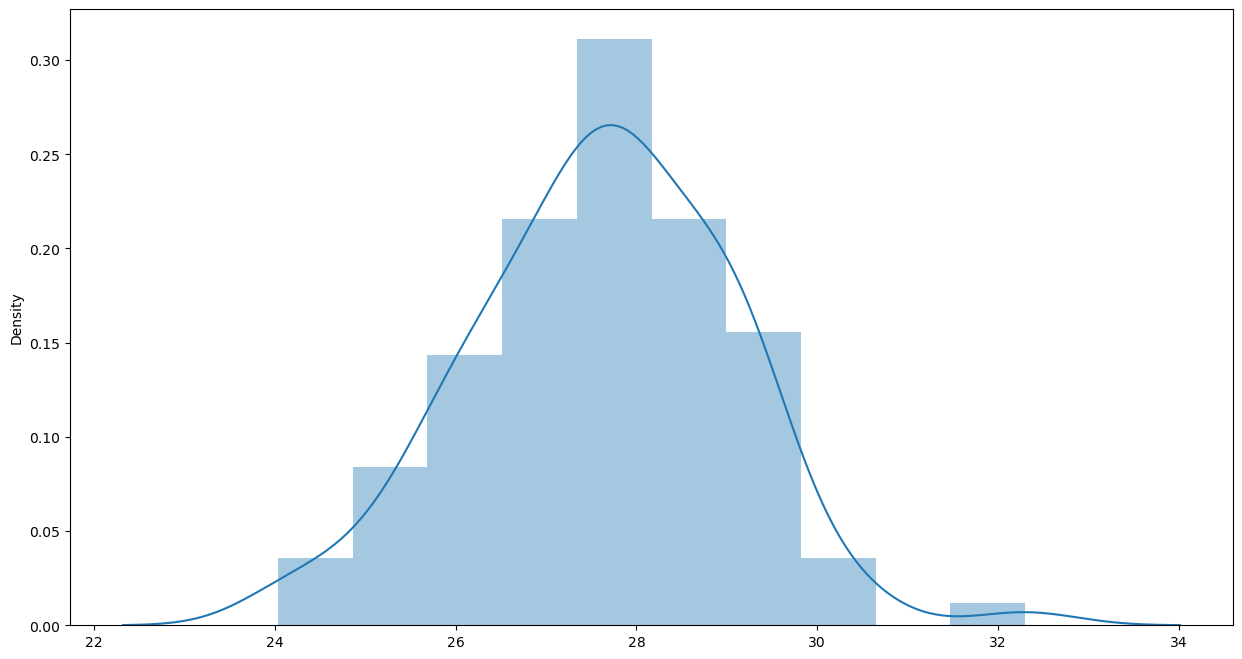

In [383]:
random.seed(6)
list6=[]
for i in range(101):
    random_30=random.choices(population=s1,k=30)
    list6.append(np.mean(random_30))
sns.distplot(list6,kde=True,hist=True)
print(np.mean(list6))
s7=pd.Series(list6)
print(s7.skew())

OBSERVATION:
From the dataset , 100 sets of data size 5 are taken( which is our sample data), the mean of all sample data are taken and a Sampling distribution is performed.

We can see that as sample increases the mean of all sample follows a normal distribution unlike the Population distrubution
( which was right skewed data in our case.)
From this we can say that ,if multiple samples are taken from population then their collective mean follows Normal distribution which corroborates Central Limit Thoerem

Q14. Treat this dataset as a binomial distribution where p is the probability 
that a shirt costs above 25 dollars. What is the probability that out of a random 
sample of 10 shirts 7 are costing more than 25 dollars

In [384]:
n=10
for i in l1:
    if i>25:
        count+=1
print(count)
p=(count/len(l1))
print(p)
p=0.76
r=7

pval=stats.binom.pmf(r,n,p)
print("probability that exactly 7 are >25 dollors is :",pval,"%")

39
0.975
probability that exactly 7 are >25 dollors is : 0.24294620371227768 %


Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 
dollars . Using the Normal approximation of a Binomial distribution, find the 
probability that in a random sample of 10 shirts 7 of them will cost less than 25 
dollars.
[ Note that the normal distribution can be used to approximate a binomial 
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [385]:
n=10
r=7
p=0.60

pval=stats.binom.pmf(r,n,p)
print("probability that 7 shirts are>25 dollors :",pval,"%")


probability that 7 shirts are>25 dollors : 0.21499084799999976 %


Q16. Compute a 95% Confidence Interval for the true price of a shirt in the 
NuCloth website using appropriate distribution.( State reasons as to why did 
you use a z or t distribution)

In [386]:
n=len(l1)
xbar=np.mean(l1)
sigma=np.std(l1)
z=stats.norm.isf(0.025)
lower_limit,upper_limit=stats.norm.interval(confidence=0.95,loc=xbar,scale=sigma/np.sqrt(n))
print(lower_limit,upper_limit)

# used z distribution as n>30.


24.68041298008275 30.56958701991725


Q17. A data scientist wants to estimate with 95% confidence the true 
proportion of shirts having price greater than 25 dollars in the NuCloth 
website. A recent study showed that 60% of all shirts have a price greater 
than 25 dollars. The data scientist wants to be accurate within 2% of the true 
proportion. Find the minimum sample size necessary

In [387]:
z=stats.norm.isf(0.025)
psamp=0.60
margin_of_error=0.02
x=psamp*(1-psamp)
n=(z**2)*x/margin_of_error**2
print("no of samples required to check shirts cost >25 dollors:",round(n))

no of samples required to check shirts cost >25 dollors: 2305


Q18. The same data scientist wants to estimate the true proportion of shirts 
having price greater than 25 dollars. She wants to be 90% confident and 
accurate within 5% of true proportion. Find the minimum sample size 
necessary

In [388]:
z=stats.norm.isf(0.05)
psamp=0.90
margin_of_error=0.05
x=psamp*(1-psamp)
n=(z**2)*x/margin_of_error**2
print("no of samples required to check shirts>25 dollors:",round(n))

no of samples required to check shirts>25 dollors: 97


Q19. NuCloth claims that currently 80% of all shirts have prices greater than 
25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 
shirts only 23 are having prices above 25 dollars.

In [389]:
# framing hypothesis
# h0: propotion of shirts pricing<25 dollors (Ppop<=25)
# ha: propotion of shirts pricing>25 dollors(Ppop>25)

n=30
Psamp=23/30
Ppop=0.80
alpha=0.05
num=Psamp-Ppop
den=np.sqrt(Ppop*(1-Ppop)/n)
zprop=num/den

pval=stats.norm.sf(zprop)
print(pval)
result(pval,alpha)
# h0: propotion of shirts pricing<25 dollors (Ppop<=25)



0.6759615659304269
fail to reject h0


Q20. A data scientist is researching the hypothesis that the average price of a shirt 
in NuCloth is higher than the supermarket. So he collects data from NuCloth and the 
supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34 
dollars in the supermarket. The standard deviations are 7.6 and 5.8 
respectively.Suppose the data scientist got these values after randomly selecting 
100 shirts from each place.
a. What hypothesis would he use to compare the shirt prices of NuCloth vs
Supermarket
b. What are critical values to be used?
c. What statistical test will be used to compare these prices?
d. Complete the test and obtain the P-value.
e. Summarize his conclusion based on the P-value.


In [390]:
# SOLUTION
# framing hypothesis
# h0:  propotion of shirt from nucloth are equal(p1=p2)

# ha : propotion of shirt from nucloth and supermarket are not equal(p1!=p2)


n1=100
n2=100
ps1=36/100
ps2=34/100
alpha=0.05

from statsmodels.stats.proportion import proportions_ztest
# formula based

num=ps1-ps2
a=((ps1*n1)+(ps2*n2))/(n1+n2)

den=np.sqrt(a*(1-a)*(1/n1 + 1/n2))
zprop=num/den
print(zprop)

pval=(stats.norm.sf(zprop))*2
print(pval)

result(pval,alpha)

# h0:  propotion of shirt from nucloth and supermarket are equal(p1=p2)


0.2964997266644399
0.7668484756777452
fail to reject h0


In [391]:
proportions_ztest(count=[36,34],nobs=[100,100],value=0)

(0.2964997266644399, 0.7668484756777452)